# Pandas 한번에 제대로 배우기

* 관계 또는 레이블링 데이터로 쉽고 직관적으로 작업할 수 있도록 고안된 빠르고 유연하며 표현력이 뛰어난 데이터 구조를 제공하는 Python 패키지



---



## Pandas 특징

* 부동 소수점이 아닌 데이터 뿐만 아니라 부동 소수점 데이터에서도 결측 데이터(NaN으로 표시됨)를 쉽게 처리
* 크기 변이성(Size Mutability): DataFrame 및 고차원 객체에서 열을 삽입 및 삭제 가능
* 자동 및 명시적(Explicit) 데이터 정렬: 객체를 라벨 집합에 명시적을 정렬하거나, 사용자가 라벨을 무시하고 Series, DataFrame 등의 계산에서 자동을 데이터 조정 가능
* 데이터 세트에서 집계 및 변환을 위한 분할(split), 적용(apply), 결합(combine)작업을 수행할 수 있는 강력하고 유연한 group-by 함수 제공
* 누락된 데이터 또는 다른 Python 및 Numpy 데이터 구조에서 서로 다른 인덱싱 데이터를 DataFrame 개체로 쉽게 변환
* 대용량 데이터 세트의 지능형 라벨 기반 슬라이싱, 고급 인덱싱 및 부분 집합 구하기 가능
* 직관적인 데이터 세트 병합 및 결합
* 축의 계층적 라벨링(눈금당 여러 개의 라벨를 가질 수 있음)
* 플랫 파일(CSV 및 구분), Excel 파일, 데이터베이스 로딩 및 초고속 HDF5 형식으 ㅣ데이터 저장/로드에 사용되는 강력한 IO 도구
* 시계열 특정 기능: 날짜 범위 생성 및 주파수 변환, 무빙 윈도우(moving window) 통계, 날짜 이동 및 지연

In [1]:
import numpy as np
import pandas as pd
pd.__version__

'1.2.0'

## Pandas 객체


### Series 객체

In [2]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0])
s

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [3]:
s.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [4]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [5]:
 s[1]

0.25

In [6]:
s[1:4]

1    0.25
2    0.50
3    0.75
dtype: float64

In [7]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index=['a', 'b', 'c', 'd', 'e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [8]:
 s['c']

0.5

In [9]:
s[['c', 'd', 'e']]

c    0.50
d    0.75
e    1.00
dtype: float64

In [10]:
'b' in s

True

In [11]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index=[2, 4, 6, 8, 10])
s

2     0.00
4     0.25
6     0.50
8     0.75
10    1.00
dtype: float64

In [12]:
s[4]

0.25

In [13]:
s[2:]

6     0.50
8     0.75
10    1.00
dtype: float64

In [14]:
s.unique()

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [15]:
s.value_counts()

0.00    1
1.00    1
0.50    1
0.75    1
0.25    1
dtype: int64

In [16]:
s.isin([0.25, 0.75])

2     False
4      True
6     False
8      True
10    False
dtype: bool

In [17]:
pop_tuple = {'서울특별시': 9720846,
             '부산광역시': 3404423,
             '인천광역시': 2947217,
             '대구광역시': 2427954,
             '대전광역시': 1471040,
             '광주광역시': 1455048}
population = pd.Series(pop_tuple)
population

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시    1455048
dtype: int64

In [18]:
population['서울특별시']

9720846

In [19]:
population['서울특별시':'대전광역시']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
dtype: int64

### DataFrame 객체

In [20]:
pd.DataFrame([{'A':2, 'B':4, 'D':3}, {'A':4, 'B':5, 'C':7}])

,A,B,D,C
0,2,4,3.0,NaN
1,4,5,NaN,7.0


In [21]:
pd.DataFrame(np.random.rand(5, 5),
             columns=['A', 'B', 'C', 'D', 'E'],
             index=[1, 2, 3, 4, 5])

,A,B,C,D,E
1,0.696103,0.478153,0.801825,0.278950,0.166626
2,0.644101,0.622786,0.490462,0.492583,0.268638
3,0.706031,0.582112,0.395749,0.183656,0.853511
4,0.494179,0.435018,0.533305,0.587854,0.782286
5,0.439613,0.885954,0.662958,0.189740,0.215086


In [22]:
male_tuple = {'서울특별시': 4732275,
             '부산광역시': 1668618,
             '인천광역시': 1476813,
             '대구광역시': 1198815,
             '대전광역시': 1198815,
             '광주광역시': 1455048}
male = pd.Series(male_tuple)
male

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시    1198815
광주광역시    1455048
dtype: int64

In [23]:
female_tuple = {'서울특별시': 4988571,
             '부산광역시': 1735805,
             '인천광역시': 1470404,
             '대구광역시': 1229139,
             '대전광역시': 736599,
             '광주광역시': 734988}
female = pd.Series(female_tuple)
female

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
dtype: int64

In [24]:
# 한 컬럼에 한 series가 사용
korea_df = pd.DataFrame({'인구수': population,
                         '남자인구수':male,
                         '여자인구수':female})
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,1198815,736599
광주광역시,1455048,1455048,734988


In [25]:
korea_df.index

Index(['서울특별시', '부산광역시', '인천광역시', '대구광역시', '대전광역시', '광주광역시'], dtype='object')

In [26]:
korea_df.columns

Index(['인구수', '남자인구수', '여자인구수'], dtype='object')

In [27]:
korea_df['여자인구수']

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [28]:
korea_df['서울특별시':'인천광역시']

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404


### Index 객체

|클래스|설명|
|--|--|
|index|일반적인 index 객체이며, Numpy 배열 형식으로 축의 이름 표현|
|int64index|정수 값을 위한 index|
|Multiindex|단일 축에 여러 단계 색인을 표현하는 계층적 index 객체(튜플의 배열과 유사)|
|Datetimeindex|Numpy의 datatime64타입으로 타임스탬프 저장|
|Periodindex|기간 데이터를 위한 index

In [29]:
idx = pd.Index([2, 4, 6, 8, 10])
idx

Int64Index([2, 4, 6, 8, 10], dtype='int64')

In [30]:
idx[1]

4

In [31]:
idx[1:2:2]

Int64Index([4], dtype='int64')

In [32]:
idx[-1::]

Int64Index([10], dtype='int64')

In [33]:
idx[::2]

Int64Index([2, 6, 10], dtype='int64')

In [34]:
print(idx)
print(idx.size)
print(idx.shape)
print(idx.ndim)
print(idx.dtype)

Int64Index([2, 4, 6, 8, 10], dtype='int64')
5
(5,)
1
int64


#### Index 연산

|연산자|메소드|설명|
|--|--|--|
||``append``|색인 객체를 추가한 새로운 색이 반환
||``difference``|색인의 차집합 반환
|``&``|``intersection``|색인의 교집합 반환
|``\|``|``union``|색인의 합집합 반환|
||``isin``|색인이 존재하는지 여부를 부리언 배열로 반환
||``delete``|색인이 삭제된 새로운 색인 반환
||``drop``|값이 삭제된 새로운 색인 반환
||``insert``|색인이 추가된 새로운 색인 반환
||``is_monotonic``|색인이 단조성을 가지면 True
||``is_unique``|중복되는 색인이 없다면 True
||``unique``|색인에서 중복되는 요소를 제거하고 유일한 값만 반환

In [35]:
idx1 = pd.Index([1, 2, 4, 6, 8])
idx2 = pd.Index([2, 4, 5, 6 ,7])
print(idx1.append(idx2))
print(idx1.difference(idx2))
print(idx1 - idx2)
print(idx1.intersection(idx2))
print(idx1 & idx2)
print(idx1.union(idx2))
print(idx1 | idx2)
print(idx1.delete(0))
print(idx1.drop(1))
print(idx1 ^ idx2) # 여집합 (공통된것을 뺀 나머지)

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([-1, -2, -1, 0, 1], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')


<ipython-input-35-ed0a47822fc2>:7: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  print(idx1 & idx2)
<ipython-input-35-ed0a47822fc2>:9: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  print(idx1 | idx2)
<ipython-input-35-ed0a47822fc2>:12: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  print(idx1 ^ idx2) # 여집합 (공통된것을 뺀 나머지)




---



## 인덱싱(Indexing)

In [36]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index=['a', 'b', 'c', 'd', 'e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [37]:
s['b']

0.25

In [38]:
'b' in s

True

In [39]:
s.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [40]:
list(s.items())

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

In [41]:
s['f'] = 1.25
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [42]:
s['a':'d']

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [43]:
s[0:4]

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [44]:
s[(s > 0.4) & (s < 0.8)]

c    0.50
d    0.75
dtype: float64

In [45]:
s[['a', 'c', 'e']]

a    0.0
c    0.5
e    1.0
dtype: float64

### Series 인덱싱

In [46]:
s = pd.Series(['a', 'b', 'c', 'd', 'e'],
              index=[1, 3, 5, 7, 9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [47]:
s[1]

'a'

In [48]:
s[2:4]

5    c
7    d
dtype: object

In [49]:
s.iloc[1]   # 0,1,2,3... 인데스로 위치

'b'

In [50]:
s.iloc[2:4]

5    c
7    d
dtype: object

In [51]:
s.reindex(range(10))

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [52]:
s.reindex(range(10), method='bfill')

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

### DataFrame 인덱싱

|사용 방법|설명|
|--|--|
|`df[val]`|하나의 컬럼 또는 여러 컬럼을 선택
|`df.loc[val]`|라벨값으로 로우의 부분집합 선택
|`df.loc[:,val]`|라벨값으로 컬럼의 부분집합 선택
|`df.loc[val1,val2]`|라벨값으로 로우와 컬럼의 부분집합 선택
|`df.iloc[where]`|정수 색인으로 로우의 부분집합 선택
|`df.iloc[:,where]`|정수 색인으로 컬럼의 부분집합 선택
|`df.iloc[where_i, where_j]`|정수 색인으로 로우와 컬럼의 부분집합 선택
|`df.at[label_i, label_j]`|로우와 컬럼의 라벨로 단일 값 선택
|`df.iat[i, j]`|로우와 컬럼의 정수 색인으로 단일 값 선택
|`reindex`|하나 이상의 축을 새로운 색인을 ㅗ재색인
|`get_value, set_value`|로우와 컬럼의 이름으로 값 선택

In [53]:
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,1198815,736599
광주광역시,1455048,1455048,734988


In [54]:
korea_df['남자인구수']

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시    1198815
광주광역시    1455048
Name: 남자인구수, dtype: int64

In [55]:
korea_df.남자인구수

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시    1198815
광주광역시    1455048
Name: 남자인구수, dtype: int64

In [56]:
korea_df.여자인구수

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [57]:
korea_df['남여비율'] = (korea_df['남자인구수'] * 100 / korea_df['여자인구수'])

In [58]:
korea_df.남여비율

서울특별시     94.862336
부산광역시     96.129346
인천광역시    100.435867
대구광역시     97.532907
대전광역시    162.750017
광주광역시    197.968946
Name: 남여비율, dtype: float64

In [59]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.40442300e+06, 1.66861800e+06, 1.73580500e+06, 9.61293463e+01],
       [2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02],
       [2.42795400e+06, 1.19881500e+06, 1.22913900e+06, 9.75329072e+01],
       [1.47104000e+06, 1.19881500e+06, 7.36599000e+05, 1.62750017e+02],
       [1.45504800e+06, 1.45504800e+06, 7.34988000e+05, 1.97968946e+02]])

In [60]:
korea_df.T

,서울특별시,부산광역시,인천광역시,대구광역시,대전광역시,광주광역시
인구수,9.720846e+06,3.404423e+06,2.947217e+06,2.427954e+06,1.471040e+06,1.455048e+06
남자인구수,4.732275e+06,1.668618e+06,1.476813e+06,1.198815e+06,1.198815e+06,1.455048e+06
여자인구수,4.988571e+06,1.735805e+06,1.470404e+06,1.229139e+06,7.365990e+05,7.349880e+05
남여비율,9.486234e+01,9.612935e+01,1.004359e+02,9.753291e+01,1.627500e+02,1.979689e+02


In [61]:
korea_df.values[0]

array([9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01])

In [62]:
korea_df['인구수']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시    1455048
Name: 인구수, dtype: int64

In [63]:
korea_df.loc[:'인천광역시', :'남자인구수']

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


In [64]:
korea_df.loc[(korea_df.여자인구수 > 1000000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907


In [65]:
korea_df.loc[(korea_df.인구수 < 2000000)]

,인구수,남자인구수,여자인구수,남여비율
대전광역시,1471040,1198815,736599,162.750017
광주광역시,1455048,1455048,734988,197.968946


In [66]:
korea_df.loc[(korea_df.인구수 > 2500000)]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867


In [67]:
korea_df.loc[korea_df.남여비율 > 100]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947217,1476813,1470404,100.435867
대전광역시,1471040,1198815,736599,162.750017
광주광역시,1455048,1455048,734988,197.968946


In [68]:
korea_df[(korea_df.인구수 > 2500000) & (korea_df.남여비율 > 100)]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947217,1476813,1470404,100.435867


In [69]:
korea_df.iloc[:3, :2]

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


### 다중 인덱싱(Multi Indexing)

* 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리
* 단일 인덱스 내에 여러 인덱스를 포함하는 다중 인덱싱

#### 다중 인덱스 Series

In [70]:
korea_df

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907
대전광역시,1471040,1198815,736599,162.750017
광주광역시,1455048,1455048,734988,197.968946


In [71]:
idx_tuples =[('서울특별시', 2010), ('서울특별시', 2020),
            ('부산광역시', 2010), ('부산광역시', 2020),
            ('인천광역시', 2010), ('인천광역시', 2020),
            ('대구광역시', 2010), ('대구광역시', 2020),
            ('대전광역시', 2010), ('대전광역시', 2020),
            ('광주광역시', 2010), ('광주광역시', 2020),]
idx_tuples

[('서울특별시', 2010),
 ('서울특별시', 2020),
 ('부산광역시', 2010),
 ('부산광역시', 2020),
 ('인천광역시', 2010),
 ('인천광역시', 2020),
 ('대구광역시', 2010),
 ('대구광역시', 2020),
 ('대전광역시', 2010),
 ('대전광역시', 2020),
 ('광주광역시', 2010),
 ('광주광역시', 2020)]

In [72]:
pop_tuples = [10312545, 9720846,
              2567910, 3404423,
              2758296, 2947217,
              1511676, 2427954,
              1503664, 1471040,
              1454636, 1455048]
population = pd.Series(pop_tuples, index=idx_tuples)
population

(서울특별시, 2010)    10312545
(서울특별시, 2020)     9720846
(부산광역시, 2010)     2567910
(부산광역시, 2020)     3404423
(인천광역시, 2010)     2758296
(인천광역시, 2020)     2947217
(대구광역시, 2010)     1511676
(대구광역시, 2020)     2427954
(대전광역시, 2010)     1503664
(대전광역시, 2020)     1471040
(광주광역시, 2010)     1454636
(광주광역시, 2020)     1455048
dtype: int64

In [73]:
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('서울특별시', 2010),
            ('서울특별시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020),
            ('대구광역시', 2010),
            ('대구광역시', 2020),
            ('대전광역시', 2010),
            ('대전광역시', 2020),
            ('광주광역시', 2010),
            ('광주광역시', 2020)],
           )

In [74]:
population = population.reindex(midx)
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     1511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [75]:
population[:, 2010]

서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
대구광역시     1511676
대전광역시     1503664
광주광역시     1454636
dtype: int64

In [76]:
population['대전광역시', :]

2010    1503664
2020    1471040
dtype: int64

In [77]:
korea_mdf = population.unstack()
korea_mdf

,2010,2020
광주광역시,1454636,1455048
대구광역시,1511676,2427954
대전광역시,1503664,1471040
부산광역시,2567910,3404423
서울특별시,10312545,9720846
인천광역시,2758296,2947217


In [78]:
korea_mdf.stack()

광주광역시  2010     1454636
       2020     1455048
대구광역시  2010     1511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
부산광역시  2010     2567910
       2020     3404423
서울특별시  2010    10312545
       2020     9720846
인천광역시  2010     2758296
       2020     2947217
dtype: int64

In [79]:
male_tuple = [5111259, 4732275,
              1773170, 1668618,
              1390356, 1476813,
              1255245, 1198815,
              753648, 734441,
              721780, 720060]
male_tuple

[5111259,
 4732275,
 1773170,
 1668618,
 1390356,
 1476813,
 1255245,
 1198815,
 753648,
 734441,
 721780,
 720060]

In [80]:
korea_mdf = pd.DataFrame({'총인구수':population,
                          '남자인구수':male_tuple})
korea_mdf

총인구수    남자인구수
서울특별시 2010  10312545  5111259
      2020   9720846  4732275
부산광역시 2010   2567910  1773170
      2020   3404423  1668618
인천광역시 2010   2758296  1390356
      2020   2947217  1476813
대구광역시 2010   1511676  1255245
      2020   2427954  1198815
대전광역시 2010   1503664   753648
      2020   1471040   734441
광주광역시 2010   1454636   721780
      2020   1455048   720060

In [81]:
female_tuples = [5201286, 4988571,
                 1794740, 1735805,
                 1367940, 1470404,
                 1256431, 1229139,
                 750016, 736599,
                 732856, 734988]
female_tuples

[5201286,
 4988571,
 1794740,
 1735805,
 1367940,
 1470404,
 1256431,
 1229139,
 750016,
 736599,
 732856,
 734988]

In [82]:
korea_mdf = pd.DataFrame({'총인구수':population,
                          '남자인구수':male_tuple,
                          '여자인구수':female_tuples})
korea_mdf

총인구수    남자인구수    여자인구수
서울특별시 2010  10312545  5111259  5201286
      2020   9720846  4732275  4988571
부산광역시 2010   2567910  1773170  1794740
      2020   3404423  1668618  1735805
인천광역시 2010   2758296  1390356  1367940
      2020   2947217  1476813  1470404
대구광역시 2010   1511676  1255245  1256431
      2020   2427954  1198815  1229139
대전광역시 2010   1503664   753648   750016
      2020   1471040   734441   736599
광주광역시 2010   1454636   721780   732856
      2020   1455048   720060   734988

In [83]:
ratio = korea_mdf['남자인구수'] * 100 / korea_mdf['여자인구수']
ratio

서울특별시  2010     98.269140
       2020     94.862336
부산광역시  2010     98.798155
       2020     96.129346
인천광역시  2010    101.638668
       2020    100.435867
대구광역시  2010     99.905606
       2020     97.532907
대전광역시  2010    100.484256
       2020     99.707032
광주광역시  2010     98.488653
       2020     97.968946
dtype: float64

In [84]:
ratio.unstack()

,2010,2020
광주광역시,98.488653,97.968946
대구광역시,99.905606,97.532907
대전광역시,100.484256,99.707032
부산광역시,98.798155,96.129346
서울특별시,98.269140,94.862336
인천광역시,101.638668,100.435867


In [85]:
korea_mdf = pd.DataFrame({'총인구수':population,
                          '남자인구수':male_tuple,
                          '여자인구수':female_tuples,
                          '남여비율':ratio})
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867
대구광역시 2010   1511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946

#### 다중 인덱스 생성

In [86]:
df = pd.DataFrame(np.random.rand(6, 3),
                  index=[['a', 'a', 'b', 'b', 'c', 'c'], [1, 2, 1, 2, 1, 2]],
                  columns=['c1', 'c2', 'c3'])
df

c1        c2        c3
a 1  0.455633  0.885743  0.880221
  2  0.068854  0.654734  0.091022
b 1  0.562752  0.801816  0.173769
  2  0.177511  0.798041  0.221772
c 1  0.291172  0.571612  0.690714
  2  0.747655  0.048625  0.410075

In [87]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b', 'c', 'c'], [1, 2, 1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [88]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2),  ('c', 1), ('c', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [89]:
pd.MultiIndex.from_product([['a', 'b', 'c'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [90]:
pd.MultiIndex(levels=[['a', 'b', 'c'], [1, 2]],
              codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [91]:
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     1511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [92]:
population.index.names = ['행정구역', '년도']
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     1511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [93]:
idx = pd.MultiIndex.from_product([['a', 'b', 'c'], [1, 2]],
                                 names=['name1', 'name2'])
cols = pd.MultiIndex.from_product([['c1', 'c2', 'c3'], [1, 2]],
                                  names=['col_name1', 'col_name2'])
data = np.round(np.random.randn(6, 6), 2)
mdf = pd.DataFrame(data, index=idx, columns=cols)
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1     -0.71 -1.05  0.78  0.46  1.03  0.43
      2      2.26 -0.24 -1.34 -0.48 -0.18  1.03
b     1     -0.18  0.24 -0.73  1.47 -0.09  1.72
      2     -1.91  0.32 -0.03 -1.31  0.02  1.15
c     1      0.57 -1.96  0.64 -1.50  0.73 -1.06
      2      0.34  1.09 -0.24  0.87  0.41 -1.33

In [94]:
mdf['c2']

col_name2       1     2
name1 name2            
a     1      0.78  0.46
      2     -1.34 -0.48
b     1     -0.73  1.47
      2     -0.03 -1.31
c     1      0.64 -1.50
      2     -0.24  0.87

#### 인덱싱 및 슬라이싱

In [95]:
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     1511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [96]:
population['인천광역시', 2010]

2758296

In [97]:
population[:, 2010]

행정구역
서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
대구광역시     1511676
대전광역시     1503664
광주광역시     1454636
dtype: int64

In [98]:
population[population > 3000000]

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2020     3404423
dtype: int64

In [99]:
population[['대구광역시', '대전광역시']]

행정구역   년도  
대구광역시  2010    1511676
       2020    2427954
대전광역시  2010    1503664
       2020    1471040
dtype: int64

In [100]:
mdf

col_name1      c1          c2          c3      
col_name2       1     2     1     2     1     2
name1 name2                                    
a     1     -0.71 -1.05  0.78  0.46  1.03  0.43
      2      2.26 -0.24 -1.34 -0.48 -0.18  1.03
b     1     -0.18  0.24 -0.73  1.47 -0.09  1.72
      2     -1.91  0.32 -0.03 -1.31  0.02  1.15
c     1      0.57 -1.96  0.64 -1.50  0.73 -1.06
      2      0.34  1.09 -0.24  0.87  0.41 -1.33

In [101]:
mdf['c2', 1]

name1  name2
a      1        0.78
       2       -1.34
b      1       -0.73
       2       -0.03
c      1        0.64
       2       -0.24
Name: (c2, 1), dtype: float64

In [102]:
mdf.iloc[:3, :4]

col_name1      c1          c2      
col_name2       1     2     1     2
name1 name2                        
a     1     -0.71 -1.05  0.78  0.46
      2      2.26 -0.24 -1.34 -0.48
b     1     -0.18  0.24 -0.73  1.47

In [103]:
mdf.loc[:, ('c2', 1)]

name1  name2
a      1        0.78
       2       -1.34
b      1       -0.73
       2       -0.03
c      1        0.64
       2       -0.24
Name: (c2, 1), dtype: float64

In [104]:
idx_slice = pd.IndexSlice
mdf.loc[idx_slice[:, 2], idx_slice[:, 1]]

,col_name1,c1,c2,c3
,col_name2,1,1,1
name1,name2,,,
a,2,2.26,-1.34,-0.18
b,2,-1.91,-0.03,0.02
c,2,0.34,-0.24,0.41


#### 다중 인덱스 재정렬

In [105]:
korea_mdf.index.names = ['행정구역', '년도']

In [106]:
# korea_mdf['서울특별시':'인천광역시'] # 정렬이 안되어있어서 오류

korea_mdf = korea_mdf.sort_index()
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946
대구광역시 2010   1511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [107]:
korea_mdf['서울특별시':'인천광역시']  # 정렬 이후 가능

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [108]:
korea_mdf.unstack(level=0)

총인구수                                                 남자인구수           \
행정구역    광주광역시    대구광역시    대전광역시    부산광역시     서울특별시    인천광역시   광주광역시    대구광역시   
년도                                                                             
2010  1454636  1511676  1503664  2567910  10312545  2758296  721780  1255245   
2020  1455048  2427954  1471040  3404423   9720846  2947217  720060  1198815   

                       ...   여자인구수                                  남여비율  \
행정구역   대전광역시    부산광역시  ...   대전광역시    부산광역시    서울특별시    인천광역시      광주광역시   
년도                     ...                                                 
2010  753648  1773170  ...  750016  1794740  5201286  1367940  98.488653   
2020  734441  1668618  ...  736599  1735805  4988571  1470404  97.968946   

                                                               
행정구역      대구광역시       대전광역시      부산광역시      서울특별시       인천광역시  
년도                                                             
2010  99.905606  100.484256  98.798155  98.269140  101.638668  
2020  97.532907   99.707032  96.129346  94.862336  100.435867  

[2 rows x 24 columns]

In [109]:
korea_mdf.unstack(level=1)

총인구수             남자인구수             여자인구수                 남여비율  \
년도         2010     2020     2010     2020     2010     2020        2010   
행정구역                                                                       
광주광역시   1454636  1455048   721780   720060   732856   734988   98.488653   
대구광역시   1511676  2427954  1255245  1198815  1256431  1229139   99.905606   
대전광역시   1503664  1471040   753648   734441   750016   736599  100.484256   
부산광역시   2567910  3404423  1773170  1668618  1794740  1735805   98.798155   
서울특별시  10312545  9720846  5111259  4732275  5201286  4988571   98.269140   
인천광역시   2758296  2947217  1390356  1476813  1367940  1470404  101.638668   

                   
년도           2020  
행정구역               
광주광역시   97.968946  
대구광역시   97.532907  
대전광역시   99.707032  
부산광역시   96.129346  
서울특별시   94.862336  
인천광역시  100.435867

In [110]:
korea_mdf.stack()

행정구역   년도         
광주광역시  2010  총인구수     1.454636e+06
             남자인구수    7.217800e+05
             여자인구수    7.328560e+05
             남여비율     9.848865e+01
       2020  총인구수     1.455048e+06
             남자인구수    7.200600e+05
             여자인구수    7.349880e+05
             남여비율     9.796895e+01
대구광역시  2010  총인구수     1.511676e+06
             남자인구수    1.255245e+06
             여자인구수    1.256431e+06
             남여비율     9.990561e+01
       2020  총인구수     2.427954e+06
             남자인구수    1.198815e+06
             여자인구수    1.229139e+06
             남여비율     9.753291e+01
대전광역시  2010  총인구수     1.503664e+06
             남자인구수    7.536480e+05
             여자인구수    7.500160e+05
             남여비율     1.004843e+02
       2020  총인구수     1.471040e+06
             남자인구수    7.344410e+05
             여자인구수    7.365990e+05
             남여비율     9.970703e+01
부산광역시  2010  총인구수     2.567910e+06
             남자인구수    1.773170e+06
             여자인구수    1.794740e+06
             남여비율     9.879815e+01
 

In [111]:
korea_mdf

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946
대구광역시 2010   1511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [112]:
idx_flat = korea_mdf.reset_index(level=0)
idx_flat

,행정구역,총인구수,남자인구수,여자인구수,남여비율
년도,,,,,
2010,광주광역시,1454636,721780,732856,98.488653
2020,광주광역시,1455048,720060,734988,97.968946
2010,대구광역시,1511676,1255245,1256431,99.905606
2020,대구광역시,2427954,1198815,1229139,97.532907
2010,대전광역시,1503664,753648,750016,100.484256
2020,대전광역시,1471040,734441,736599,99.707032
2010,부산광역시,2567910,1773170,1794740,98.798155
2020,부산광역시,3404423,1668618,1735805,96.129346
2010,서울특별시,10312545,5111259,5201286,98.269140


In [113]:
idx_flat = korea_mdf.reset_index(level=(0, 1))
idx_flat

,행정구역,년도,총인구수,남자인구수,여자인구수,남여비율
0,광주광역시,2010,1454636,721780,732856,98.488653
1,광주광역시,2020,1455048,720060,734988,97.968946
2,대구광역시,2010,1511676,1255245,1256431,99.905606
3,대구광역시,2020,2427954,1198815,1229139,97.532907
4,대전광역시,2010,1503664,753648,750016,100.484256
5,대전광역시,2020,1471040,734441,736599,99.707032
6,부산광역시,2010,2567910,1773170,1794740,98.798155
7,부산광역시,2020,3404423,1668618,1735805,96.129346
8,서울특별시,2010,10312545,5111259,5201286,98.269140
9,서울특별시,2020,9720846,4732275,4988571,94.862336


In [114]:
idx_flat.set_index(['행정구역', '년도'])

총인구수    남자인구수    여자인구수        남여비율
행정구역  년도                                          
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946
대구광역시 2010   1511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

## 데이터 연산

In [115]:
s = pd.Series(np.random.randint(0, 10, 5))
s

0    3
1    6
2    1
3    6
4    4
dtype: int32

In [116]:
df = pd.DataFrame(np.random.randint(0, 10, (3, 3)),
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,2,9,1
1,3,5,0
2,1,2,5


In [117]:
np.exp(s)

0     20.085537
1    403.428793
2      2.718282
3    403.428793
4     54.598150
dtype: float64

In [118]:
np.cos(df * np.pi / 4)

,A,B,C
0,6.123234e-17,7.071068e-01,0.707107
1,-7.071068e-01,-7.071068e-01,1.000000
2,7.071068e-01,6.123234e-17,-0.707107


In [119]:
s1 = pd.Series([1, 3, 5,  7, 9], index=[0, 1, 2, 3, 4])
s2 = pd.Series([2, 4, 6, 8, 10], index=[1, 2, 3, 4, 5])
s1 + s2 # index가 기준으로 연산, 없으면 NaN

0     NaN
1     5.0
2     9.0
3    13.0
4    17.0
5     NaN
dtype: float64

In [120]:
s1.add(s2, fill_value=0)

0     1.0
1     5.0
2     9.0
3    13.0
4    17.0
5    10.0
dtype: float64

In [121]:
df1 = pd.DataFrame(np.random.randint(0, 20, (3, 3)),
                   columns=list('ACD'))
df1

,A,C,D
0,18,12,2
1,7,13,18
2,9,8,9


In [122]:
df2 = pd.DataFrame(np.random.randint(0, 20, (5, 5)),
                   columns=list('BAECD'))
df2

,B,A,E,C,D
0,9,2,16,7,12
1,12,6,14,1,14
2,2,11,9,11,5
3,1,14,7,6,7
4,17,15,1,0,8


In [123]:
df1 + df2

,A,B,C,D,E
0,20.0,NaN,19.0,14.0,NaN
1,13.0,NaN,14.0,32.0,NaN
2,20.0,NaN,19.0,14.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [124]:
 fvalue = df1.stack().mean()
 df1.add(df2, fill_value=fvalue)

,A,B,C,D,E
0,20.000000,19.666667,19.000000,14.000000,26.666667
1,13.000000,22.666667,14.000000,32.000000,24.666667
2,20.000000,12.666667,19.000000,14.000000,19.666667
3,24.666667,11.666667,16.666667,17.666667,17.666667
4,25.666667,27.666667,10.666667,18.666667,11.666667


### 연산자 범용 함수

|Python 연산자|Pandas 메소드|
|--|--|
|`+`|`add`, `radd`|
|`-`|`sub`,`rsub`,`subtract`|
|`*`|`mul`,`rmul`,`multiply`|
|`/`|`truediv`,`div`,`rdiv`,`divide`|
|`//`|`floordiv`,`rfloordiv`|
|`%`|`mod`|
|`**`|`pow`,`rpow`|

#### add()

In [125]:
a = np.random.randint(1, 10, size=(3, 3))
a

array([[3, 6, 3],
       [8, 8, 7],
       [1, 7, 2]])

In [126]:
a + a[0]

array([[ 6, 12,  6],
       [11, 14, 10],
       [ 4, 13,  5]])

In [127]:
df = pd.DataFrame(a, columns=list('ABC'))
df

,A,B,C
0,3,6,3
1,8,8,7
2,1,7,2


In [128]:
df + df.iloc[0]

,A,B,C
0,6,12,6
1,11,14,10
2,4,13,5


In [129]:
df.add(df.iloc[0])

,A,B,C
0,6,12,6
1,11,14,10
2,4,13,5


#### sub() / subtract()

In [130]:
a

array([[3, 6, 3],
       [8, 8, 7],
       [1, 7, 2]])

In [131]:
a - a[0]

array([[ 0,  0,  0],
       [ 5,  2,  4],
       [-2,  1, -1]])

In [132]:
df

,A,B,C
0,3,6,3
1,8,8,7
2,1,7,2


In [133]:
df - df.iloc[0]

,A,B,C
0,0,0,0
1,5,2,4
2,-2,1,-1


In [134]:
df.sub(df.iloc[0])

,A,B,C
0,0,0,0
1,5,2,4
2,-2,1,-1


In [135]:
df.subtract(df['B'], axis=0)

,A,B,C
0,-3,0,-3
1,0,0,-1
2,-6,0,-5


#### mul() / multply()




In [136]:
a

array([[3, 6, 3],
       [8, 8, 7],
       [1, 7, 2]])

In [137]:
a * a[1]

array([[24, 48, 21],
       [64, 64, 49],
       [ 8, 56, 14]])

In [138]:
df

,A,B,C
0,3,6,3
1,8,8,7
2,1,7,2


In [139]:
df * df.iloc[1]

,A,B,C
0,24,48,21
1,64,64,49
2,8,56,14


In [140]:
df.mul(df.iloc[1])

,A,B,C
0,24,48,21
1,64,64,49
2,8,56,14


In [141]:
df.multiply(df.iloc[2])

,A,B,C
0,3,42,6
1,8,56,14
2,1,49,4


#### truediv() /  div() / divide() / floordiv()

In [142]:
a

array([[3, 6, 3],
       [8, 8, 7],
       [1, 7, 2]])

In [143]:
a / a[0]

array([[1.        , 1.        , 1.        ],
       [2.66666667, 1.33333333, 2.33333333],
       [0.33333333, 1.16666667, 0.66666667]])

In [144]:
df

,A,B,C
0,3,6,3
1,8,8,7
2,1,7,2


In [145]:
df / df.iloc[0]

,A,B,C
0,1.000000,1.000000,1.000000
1,2.666667,1.333333,2.333333
2,0.333333,1.166667,0.666667


In [146]:
df.truediv(df.iloc[0])

,A,B,C
0,1.000000,1.000000,1.000000
1,2.666667,1.333333,2.333333
2,0.333333,1.166667,0.666667


In [147]:
df.div(df.iloc[1])

,A,B,C
0,0.375,0.750,0.428571
1,1.000,1.000,1.000000
2,0.125,0.875,0.285714


In [148]:
df.divide(df.iloc[2])

,A,B,C
0,3.0,0.857143,1.5
1,8.0,1.142857,3.5
2,1.0,1.000000,1.0


In [149]:
a // a[0]

array([[1, 1, 1],
       [2, 1, 2],
       [0, 1, 0]], dtype=int32)

In [150]:
df. floordiv(df.iloc[0])

,A,B,C
0,1,1,1
1,2,1,2
2,0,1,0


#### mod()

In [151]:
a

array([[3, 6, 3],
       [8, 8, 7],
       [1, 7, 2]])

In [152]:
a % a[0]

array([[0, 0, 0],
       [2, 2, 1],
       [1, 1, 2]], dtype=int32)

In [153]:
df

,A,B,C
0,3,6,3
1,8,8,7
2,1,7,2


In [154]:
df.mod(df.iloc[0])

,A,B,C
0,0,0,0
1,2,2,1
2,1,1,2


#### pow()

In [155]:
a

array([[3, 6, 3],
       [8, 8, 7],
       [1, 7, 2]])

In [156]:
a ** a[0]

array([[    27,  46656,     27],
       [   512, 262144,    343],
       [     1, 117649,      8]], dtype=int32)

In [157]:
df

,A,B,C
0,3,6,3
1,8,8,7
2,1,7,2


In [158]:
df.pow(df.iloc[0])

,A,B,C
0,27,46656,27
1,512,262144,343
2,1,117649,8


In [159]:
row = df.iloc[0, ::2]
row

A    3
C    3
Name: 0, dtype: int32

In [160]:
df - row

,A,B,C
0,0.0,NaN,0.0
1,5.0,NaN,4.0
2,-2.0,NaN,-1.0


### 정렬(Sort)

In [161]:
s = pd.Series(range(5), index=['A', 'D', 'B', 'C', 'E'])
s

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [162]:
s.sort_index()

A    0
B    2
C    3
D    1
E    4
dtype: int64

In [163]:
s.sort_values()

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [164]:
df = pd.DataFrame(np.random.randint(0, 10, (4, 4)),
                  index=[2, 4, 1, 3],
                  columns=list('BDAC'))
df

,B,D,A,C
2,2,1,8,2
4,1,5,5,3
1,8,0,5,7
3,9,2,5,0


In [165]:
df.sort_index()

,B,D,A,C
1,8,0,5,7
2,2,1,8,2
3,9,2,5,0
4,1,5,5,3


In [166]:
df.sort_index(axis=1)

,A,B,C,D
2,8,2,2,1
4,5,1,3,5
1,5,8,7,0
3,5,9,0,2


In [167]:
 df.sort_values(by='A')

,B,D,A,C
4,1,5,5,3
1,8,0,5,7
3,9,2,5,0
2,2,1,8,2


In [168]:
df.sort_values(by=['A', 'C'])

,B,D,A,C
3,9,2,5,0
4,1,5,5,3
1,8,0,5,7
2,2,1,8,2


### 순위(Ranking)

|메소드|설명|
|--|--|
|`average`|기본값, 순위에 같은 값을 가지는 항목들의 평균값을 사용|
|`min`|같은 값을 가지는 그룹을 낮은 순위로 지정|
|`max`|같은 값을 가지는 그룹을 높은 순위로 지정|
|`first`|데이터 내의 위치에 따라 순위 지정|
|`dense`|같은 그룹 내에서 모두 같은 순위를 적용하지 않고 1씩 증가|

In [169]:
s = pd.Series([-2, 4, 7, 3, 0, 7, 5, -4, 2, 6])
s

0   -2
1    4
2    7
3    3
4    0
5    7
6    5
7   -4
8    2
9    6
dtype: int64

In [170]:
s.rank()

0    2.0
1    6.0
2    9.5
3    5.0
4    3.0
5    9.5
6    7.0
7    1.0
8    4.0
9    8.0
dtype: float64

In [171]:
s.rank(method='first')

0     2.0
1     6.0
2     9.0
3     5.0
4     3.0
5    10.0
6     7.0
7     1.0
8     4.0
9     8.0
dtype: float64

In [172]:
s.rank(method='max')

0     2.0
1     6.0
2    10.0
3     5.0
4     3.0
5    10.0
6     7.0
7     1.0
8     4.0
9     8.0
dtype: float64

### 고성능 연산

In [173]:
nrows, ncols = 100000, 100
df1, df2, df3, df4 = (pd.DataFrame(np.random.rand(nrows, ncols)) for i in range(4))

In [174]:
%timeit df1 + df2 + df3 + df4

62.1 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [175]:
%timeit pd.eval('df1 + df2 + df3 + df4')

28.6 ms ± 648 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [176]:
%timeit df1 * -df2 / (-df3 * df4)

108 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [177]:
%timeit pd.eval('df1 * -df2 / (-df3 * df4)')

27.1 ms ± 1.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [178]:
%timeit (df1 < df2) & (df2 <= df3) & (df3 != df4)

38.7 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [179]:
%timeit pd.eval('(df1 < df2) & (df2 <= df3) & (df3 != df4)')

19.1 ms ± 508 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [180]:
df = pd.DataFrame(np.random.rand(1000000, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.head()

,A,B,C,D,E
0,0.679161,0.671811,0.756645,0.750642,0.529998
1,0.809895,0.082472,0.741846,0.900239,0.108483
2,0.971809,0.815972,0.543335,0.090615,0.523468
3,0.164007,0.066655,0.709465,0.742854,0.637104
4,0.279125,0.756595,0.854014,0.147099,0.213732


In [181]:
%timeit df['A'] + df['B'] / df['C'] -df['D'] + df['E']

11.1 ms ± 29.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [182]:
%timeit pd.eval('df.A + df.B / df.C -df.D + df.E')

3.79 ms ± 74.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [183]:
%timeit df.eval('A + B / C - D * E')

8.6 ms ± 87.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [184]:
df.eval('R = A + B / C - D + E', inplace=True)
df.head()

,A,B,C,D,E,R
0,0.679161,0.671811,0.756645,0.750642,0.529998,1.346398
1,0.809895,0.082472,0.741846,0.900239,0.108483,0.129310
2,0.971809,0.815972,0.543335,0.090615,0.523468,2.906446
3,0.164007,0.066655,0.709465,0.742854,0.637104,0.152208
4,0.279125,0.756595,0.854014,0.147099,0.213732,1.231687


In [185]:
df.eval('R = A - B / C + D + E', inplace=True)
df.head()

,A,B,C,D,E,R
0,0.679161,0.671811,0.756645,0.750642,0.529998,1.071919
1,0.809895,0.082472,0.741846,0.900239,0.108483,1.707446
2,0.971809,0.815972,0.543335,0.090615,0.523468,0.084107
3,0.164007,0.066655,0.709465,0.742854,0.637104,1.450014
4,0.279125,0.756595,0.854014,0.147099,0.213732,-0.245973


In [186]:
col_mean = df.mean(axis=1)
df['A'] + col_mean

0         1.422523
1         1.534958
2         1.476693
3         0.792357
4         0.613223
            ...   
999995    0.633942
999996    1.426991
999997    1.377724
999998    0.759458
999999    1.031111
Length: 1000000, dtype: float64

In [187]:
df.eval('A + @col_mean')    # 외부 변수는 @로 참조할 수 있다.

0         1.422523
1         1.534958
2         1.476693
3         0.792357
4         0.613223
            ...   
999995    0.633942
999996    1.426991
999997    1.377724
999998    0.759458
999999    1.031111
Length: 1000000, dtype: float64

In [188]:
df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]

,A,B,C,D,E,R
3,0.164007,0.066655,0.709465,0.742854,0.637104,1.450014
18,0.297380,0.092737,0.570595,0.436177,0.223894,0.794924
31,0.097729,0.260132,0.799900,0.235162,0.597264,0.604949
32,0.093882,0.058535,0.976118,0.961055,0.035718,1.030689
41,0.478292,0.464975,0.796855,0.650240,0.546075,1.091095
...,...,...,...,...,...,...
999988,0.369605,0.031119,0.763300,0.839340,0.245689,1.413866
999989,0.047688,0.433182,0.600286,0.067844,0.165788,-0.440307
999995,0.310135,0.246114,0.721884,0.286936,0.060819,0.316957
999998,0.282490,0.340302,0.658317,0.427382,0.480185,0.673130


In [189]:
pd.eval('df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]')

,A,B,C,D,E,R
3,0.164007,0.066655,0.709465,0.742854,0.637104,1.450014
18,0.297380,0.092737,0.570595,0.436177,0.223894,0.794924
31,0.097729,0.260132,0.799900,0.235162,0.597264,0.604949
32,0.093882,0.058535,0.976118,0.961055,0.035718,1.030689
41,0.478292,0.464975,0.796855,0.650240,0.546075,1.091095
...,...,...,...,...,...,...
999988,0.369605,0.031119,0.763300,0.839340,0.245689,1.413866
999989,0.047688,0.433182,0.600286,0.067844,0.165788,-0.440307
999995,0.310135,0.246114,0.721884,0.286936,0.060819,0.316957
999998,0.282490,0.340302,0.658317,0.427382,0.480185,0.673130


In [190]:
 df.query('(A < 0.5) and (B < 0.5) and (C > 0.5)')

,A,B,C,D,E,R
3,0.164007,0.066655,0.709465,0.742854,0.637104,1.450014
18,0.297380,0.092737,0.570595,0.436177,0.223894,0.794924
31,0.097729,0.260132,0.799900,0.235162,0.597264,0.604949
32,0.093882,0.058535,0.976118,0.961055,0.035718,1.030689
41,0.478292,0.464975,0.796855,0.650240,0.546075,1.091095
...,...,...,...,...,...,...
999988,0.369605,0.031119,0.763300,0.839340,0.245689,1.413866
999989,0.047688,0.433182,0.600286,0.067844,0.165788,-0.440307
999995,0.310135,0.246114,0.721884,0.286936,0.060819,0.316957
999998,0.282490,0.340302,0.658317,0.427382,0.480185,0.673130


In [191]:
col_mean = df['D'].mean()
df[(df.A < col_mean) & (df.B < col_mean)]

,A,B,C,D,E,R
3,0.164007,0.066655,0.709465,0.742854,0.637104,1.450014
5,0.032527,0.003748,0.154662,0.523770,0.725669,1.257730
14,0.190047,0.198523,0.340626,0.312573,0.865511,0.785310
15,0.286979,0.327719,0.135040,0.458876,0.449481,-1.231488
16,0.463786,0.112499,0.057592,0.783269,0.557894,-0.148430
...,...,...,...,...,...,...
999988,0.369605,0.031119,0.763300,0.839340,0.245689,1.413866
999989,0.047688,0.433182,0.600286,0.067844,0.165788,-0.440307
999995,0.310135,0.246114,0.721884,0.286936,0.060819,0.316957
999998,0.282490,0.340302,0.658317,0.427382,0.480185,0.673130


In [192]:
df.query('A < @col_mean and B < @col_mean')

,A,B,C,D,E,R
3,0.164007,0.066655,0.709465,0.742854,0.637104,1.450014
5,0.032527,0.003748,0.154662,0.523770,0.725669,1.257730
14,0.190047,0.198523,0.340626,0.312573,0.865511,0.785310
15,0.286979,0.327719,0.135040,0.458876,0.449481,-1.231488
16,0.463786,0.112499,0.057592,0.783269,0.557894,-0.148430
...,...,...,...,...,...,...
999988,0.369605,0.031119,0.763300,0.839340,0.245689,1.413866
999989,0.047688,0.433182,0.600286,0.067844,0.165788,-0.440307
999995,0.310135,0.246114,0.721884,0.286936,0.060819,0.316957
999998,0.282490,0.340302,0.658317,0.427382,0.480185,0.673130


## 데이터 결합

### Concat() / Append()

In [193]:
s1 = pd.Series(['a', 'b'], index=[1, 2])
s2 = pd.Series(['c', 'd'], index=[3, 4])
pd.concat([s1, s2])

1    a
2    b
3    c
4    d
dtype: object

In [194]:
def create_df(cols, idx):
  data = {c: [str(c.lower()) + str(i) for i in idx] for c in cols}
  return pd.DataFrame(data, idx)

In [195]:
df1 = create_df('AB', [1, 2])
df1

,A,B
1,a1,b1
2,a2,b2


In [196]:
df2 = create_df('AB', [3, 4])
df2

,A,B
3,a3,b3
4,a4,b4


In [197]:
pd.concat([df1, df2])

,A,B
1,a1,b1
2,a2,b2
3,a3,b3
4,a4,b4


In [198]:
df3 = create_df('AB', [0, 1])
df3

,A,B
0,a0,b0
1,a1,b1


In [199]:
df4 = create_df('CD', [0, 1])
df4

,C,D
0,c0,d0
1,c1,d1


In [200]:
pd.concat([df3, df4])

,A,B,C,D
0,a0,b0,NaN,NaN
1,a1,b1,NaN,NaN
0,NaN,NaN,c0,d0
1,NaN,NaN,c1,d1


In [201]:
pd.concat([df3, df4], axis=1)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1


In [202]:
pd.concat([df1, df3])

,A,B
1,a1,b1
2,a2,b2
0,a0,b0
1,a1,b1


In [203]:
# pd.concat([df1, df3], verify_integrity=True) # 인덱스 1이 겹칠 경우 오류가 나게 해줌

In [204]:
pd.concat([df1, df3], ignore_index=True)

,A,B
0,a1,b1
1,a2,b2
2,a0,b0
3,a1,b1


In [205]:
pd.concat([df1, df3], keys=['X', 'Y'])

A   B
X 1  a1  b1
  2  a2  b2
Y 0  a0  b0
  1  a1  b1

In [206]:
df5 = create_df('ABC', [1, 2])
df6 = create_df('BCD', [3, 4])
pd.concat([df5, df6])

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [207]:
pd.concat([df5, df6], join='inner')

,B,C
1,b1,c1
2,b2,c2
3,b3,c3
4,b4,c4


In [208]:
df5.append(df6)

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


### 병합과 조인

In [209]:
df1 = pd.DataFrame({'학생': ['홍길동', '이순신', '임걱정', '김유신'],
                    '학과': ['경영학과', '교육학과', '컴퓨터학과', '통계학과']})
df1

,학생,학과
0,홍길동,경영학과
1,이순신,교육학과
2,임걱정,컴퓨터학과
3,김유신,통계학과


In [210]:
df2 = pd.DataFrame({'학생': ['홍길동', '이순신', '임걱정', '김유신'],
                    '입학년도': [2012, 2016, 2019, 2020]})
df2

,학생,입학년도
0,홍길동,2012
1,이순신,2016
2,임걱정,2019
3,김유신,2020


In [211]:
df3 = pd.merge(df1, df2)
df3

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임걱정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [212]:
df4 = pd.DataFrame({'학과': ['경영학과', '교육학과', '컴퓨터학과', '통계학과'],
                    '학과장': ['황희', '장영실', '안창호', '정약용']})
df4

,학과,학과장
0,경영학과,황희
1,교육학과,장영실
2,컴퓨터학과,안창호
3,통계학과,정약용


In [213]:
pd.merge(df3, df4)

,학생,학과,입학년도,학과장
0,홍길동,경영학과,2012,황희
1,이순신,교육학과,2016,장영실
2,임걱정,컴퓨터학과,2019,안창호
3,김유신,통계학과,2020,정약용


In [214]:
df5 = pd.DataFrame({'학과': ['경영학과', '교육학과', '교육학과', '컴퓨터학과', '컴퓨터학과', '통계학과'],
                   '과목': ['경영개론', '기초수학', '물리학', '프로그래밍', '운영체제', '확률론']})
df5

,학과,과목
0,경영학과,경영개론
1,교육학과,기초수학
2,교육학과,물리학
3,컴퓨터학과,프로그래밍
4,컴퓨터학과,운영체제
5,통계학과,확률론


In [215]:
pd.merge(df1, df5)

,학생,학과,과목
0,홍길동,경영학과,경영개론
1,이순신,교육학과,기초수학
2,이순신,교육학과,물리학
3,임걱정,컴퓨터학과,프로그래밍
4,임걱정,컴퓨터학과,운영체제
5,김유신,통계학과,확률론


In [216]:
pd.merge(df1, df2, on='학생')

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임걱정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [217]:
df6 = pd.DataFrame({'이름': ['홍길동', '이순신', '임걱정', '김유신'],
                    '성적': ['A', 'A+', 'B', 'A+']})
df6

,이름,성적
0,홍길동,A
1,이순신,A+
2,임걱정,B
3,김유신,A+


In [218]:
pd.merge(df1, df6, left_on='학생', right_on='이름')

,학생,학과,이름,성적
0,홍길동,경영학과,홍길동,A
1,이순신,교육학과,이순신,A+
2,임걱정,컴퓨터학과,임걱정,B
3,김유신,통계학과,김유신,A+


In [219]:
pd.merge(df1, df6, left_on='학생', right_on='이름').drop('이름', axis=1)

,학생,학과,성적
0,홍길동,경영학과,A
1,이순신,교육학과,A+
2,임걱정,컴퓨터학과,B
3,김유신,통계학과,A+


In [220]:
mdf1 = df1.set_index('학생')
mdf2 = df2.set_index('학생')

In [221]:
mdf1

,학과
학생,
홍길동,경영학과
이순신,교육학과
임걱정,컴퓨터학과
김유신,통계학과


In [222]:
mdf2

,입학년도
학생,
홍길동,2012
이순신,2016
임걱정,2019
김유신,2020


In [223]:
pd.merge(mdf1, mdf2, left_index=True, right_index=True)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임걱정,컴퓨터학과,2019
김유신,통계학과,2020


In [224]:
mdf1.join(mdf2)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임걱정,컴퓨터학과,2019
김유신,통계학과,2020


In [225]:
pd.merge(mdf1, df6, left_index=True, right_on='이름')

,학과,이름,성적
0,경영학과,홍길동,A
1,교육학과,이순신,A+
2,컴퓨터학과,임걱정,B
3,통계학과,김유신,A+


In [226]:
df7 = pd.DataFrame({'이름': ['홍길동', '이순신', '임걱정'],
                    '주문음식': ['햄버거', '피자', '짜장면']})
df7

,이름,주문음식
0,홍길동,햄버거
1,이순신,피자
2,임걱정,짜장면


In [227]:
df8 = pd.DataFrame({'이름': ['홍길동', '이순신', '김유신'],
                    '주문음료': ['콜라', '사이다', '커피']})
df8

,이름,주문음료
0,홍길동,콜라
1,이순신,사이다
2,김유신,커피


In [228]:
pd.merge(df7, df8)

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [229]:
pd.merge(df7, df8, how='inner')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [230]:
pd.merge(df7, df8, how='outer')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임걱정,짜장면,NaN
3,김유신,NaN,커피


In [231]:
pd.merge(df7, df8, how='left')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임걱정,짜장면,NaN


In [232]:
pd.merge(df7, df8, how='right')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,김유신,NaN,커피


In [233]:
df9 = pd.DataFrame({'이름': ['홍길동', '이순신', '임걱정', '김유신'],
                    '순위': [3, 2, 4, 1]})
df9

,이름,순위
0,홍길동,3
1,이순신,2
2,임걱정,4
3,김유신,1


In [234]:
df10 = pd.DataFrame({'이름': ['홍길동', '이순신', '임걱정', '김유신'],
                    '순위': [4, 1, 3, 2]})
df10

,이름,순위
0,홍길동,4
1,이순신,1
2,임걱정,3
3,김유신,2


In [235]:
pd.merge(df9, df10, on='이름')

,이름,순위_x,순위_y
0,홍길동,3,4
1,이순신,2,1
2,임걱정,4,3
3,김유신,1,2


In [236]:
pd.merge(df9, df10, on='이름', suffixes=['_인기','_성적'])

,이름,순위_인기,순위_성적
0,홍길동,3,4
1,이순신,2,1
2,임걱정,4,3
3,김유신,1,2


## 데이터 집계와 그룹 연산

#### 집계 연산(Aggregation)

|집계|설명|
|--|--|
|`count`|전체 개수|
|`head`,`tail`|앞의 항목 일부 반환, 뒤의 항목 일부 반환|
|`describe`|Series, DataFrame의 각 컬럼에 대한 요약 통계|
|`min`,`max`|최소값, 최대값|
|`cummin`,`cummax`|누적 최소값, 누적 최대값|
|`argmin`,`argmax`|최소값과 최대값의 색인 위치|
|`idxmin`,`idxmax`|최소값과 최대값의 색인값|
|`mean`,`median`|평균값, 중앙값|
|`std`,`var`|표준편차, 분산|
|`skew`|왜도(skewness)값 계산
|`kurt`|첨도(kurtosis)값 계산|
|`mad`|절대 평균 편차(Mean Absolute Deviation)|
|`sum`,`cumsum`|전체 항목 합, 누적합|
|`prod`,`cumprod`|전체 항목 곱, 누적곱|
|`quantile`|0부터 1까지의 분위수 계산|
|`diff`|1차 산술차 계산|
|`pct_change`|퍼센트 변화율 계산|
|`corr`,`cov`|상관관계, 공분산 계산|


In [237]:
df = pd.DataFrame([[1, 1.2, np.nan],
                  [2.4, 5.5, 4.2],
                  [np.nan, np.nan, np.nan],
                  [0.44, -3.1, -4.1]],
                  index=[1, 2, 3, 4],
                  columns=list('ABC'))
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [238]:
df.head(2)

,A,B,C
1,1.0,1.2,NaN
2,2.4,5.5,4.2


In [239]:
df.tail(2)

,A,B,C
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [240]:
df.describe()

,A,B,C
count,3.000000,3.00,2.000000
mean,1.280000,1.20,0.050000
std,1.009554,4.30,5.868986
min,0.440000,-3.10,-4.100000
25%,0.720000,-0.95,-2.025000
50%,1.000000,1.20,0.050000
75%,1.700000,3.35,2.125000
max,2.400000,5.50,4.200000


**argmin(), argmax() 값이 2가 나오는 것이 이해가 안됨...**

In [241]:
print(df)
print(np.argmin(df), np.argmax(df))

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
2 2


In [242]:
print(df)
print(df.idxmin())
print(df.idxmax())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    4
B    4
C    4
dtype: int64
A    2
B    2
C    2
dtype: int64


In [243]:
print(df)
print(df.std())
print(df.var())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.009554
B    4.300000
C    5.868986
dtype: float64
A     1.0192
B    18.4900
C    34.4450
dtype: float64


In [244]:
print(df)
print(df.skew())
print(df.kurt())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.15207
B    0.00000
C        NaN
dtype: float64
A   NaN
B   NaN
C   NaN
dtype: float64


In [245]:
print(df)
print(df.sum())
print(df.cumsum())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    3.84
B    3.60
C    0.10
dtype: float64
      A    B    C
1  1.00  1.2  NaN
2  3.40  6.7  4.2
3   NaN  NaN  NaN
4  3.84  3.6  0.1


In [246]:
print(df)
print(df.prod())
print(df.cumprod())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A     1.056
B   -20.460
C   -17.220
dtype: float64
       A      B      C
1  1.000   1.20    NaN
2  2.400   6.60   4.20
3    NaN    NaN    NaN
4  1.056 -20.46 -17.22


In [247]:
df.diff()

,A,B,C
1,NaN,NaN,NaN
2,1.4,4.3,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [248]:
df.quantile()

A    1.00
B    1.20
C    0.05
Name: 0.5, dtype: float64

In [249]:
df.pct_change()

,A,B,C
1,NaN,NaN,NaN
2,1.400000,3.583333,NaN
3,0.000000,0.000000,0.00000
4,-0.816667,-1.563636,-1.97619


In [250]:
df.corr()

,A,B,C
A,1.000000,0.970725,1.0
B,0.970725,1.000000,1.0
C,1.000000,1.000000,1.0


In [251]:
 df.corrwith(df.B)

A    0.970725
B    1.000000
C    1.000000
dtype: float64

In [252]:
df.cov()

,A,B,C
A,1.0192,4.214,8.134
B,4.2140,18.490,35.690
C,8.1340,35.690,34.445


In [253]:
print(df)
df['B'].unique()

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1


array([ 1.2,  5.5,  nan, -3.1])

In [254]:
df['A'].value_counts()

2.40    1
0.44    1
1.00    1
Name: A, dtype: int64

### GroupBy 연산

In [255]:
df = pd.DataFrame({'c1': ['a','a', 'b', 'b', 'c', 'd', 'b'],
                   'c2': ['A', 'B', 'B', 'A', 'D', 'C', 'C'],
                   'c3': np.random.randint(7),
                   'c4': np.random.random(7)})
df

,c1,c2,c3,c4
0,a,A,2,0.842353
1,a,B,2,0.216158
2,b,B,2,0.991824
3,b,A,2,0.111381
4,c,D,2,0.541226
5,d,C,2,0.895050
6,b,C,2,0.771920


In [256]:
df.dtypes

c1     object
c2     object
c3      int64
c4    float64
dtype: object

In [257]:
df['c3'].groupby(df['c1']).mean()

c1
a    2
b    2
c    2
d    2
Name: c3, dtype: int64

In [258]:
df['c4'].groupby(df['c2']).std()

c2
A    0.516875
B    0.548478
C    0.087066
D         NaN
Name: c4, dtype: float64

In [259]:
df['c4'].groupby([df['c1'], df['c2']]).mean().unstack()

c2,A,B,C,D
c1,,,,
a,0.842353,0.216158,NaN,NaN
b,0.111381,0.991824,0.77192,NaN
c,NaN,NaN,NaN,0.541226
d,NaN,NaN,0.89505,NaN


In [260]:
df.groupby('c1').mean()

,c3,c4
c1,,
a,2,0.529255
b,2,0.625041
c,2,0.541226
d,2,0.895050


In [261]:
df.groupby(['c1', 'c2']).mean()

c3        c4
c1 c2              
a  A    2  0.842353
   B    2  0.216158
b  A    2  0.111381
   B    2  0.991824
   C    2  0.771920
c  D    2  0.541226
d  C    2  0.895050

In [262]:
df.groupby(['c1', 'c2']).size()

c1  c2
a   A     1
    B     1
b   A     1
    B     1
    C     1
c   D     1
d   C     1
dtype: int64

In [263]:
for c1, group in df.groupby('c1'):
  print(c1)
  print(group)

a
  c1 c2  c3        c4
0  a  A   2  0.842353
1  a  B   2  0.216158
b
  c1 c2  c3        c4
2  b  B   2  0.991824
3  b  A   2  0.111381
6  b  C   2  0.771920
c
  c1 c2  c3        c4
4  c  D   2  0.541226
d
  c1 c2  c3       c4
5  d  C   2  0.89505


In [264]:
for (c1, c2), group in df.groupby(['c1', 'c2']):
  print((c1, c2))
  print(group)

('a', 'A')
  c1 c2  c3        c4
0  a  A   2  0.842353
('a', 'B')
  c1 c2  c3        c4
1  a  B   2  0.216158
('b', 'A')
  c1 c2  c3        c4
3  b  A   2  0.111381
('b', 'B')
  c1 c2  c3        c4
2  b  B   2  0.991824
('b', 'C')
  c1 c2  c3       c4
6  b  C   2  0.77192
('c', 'D')
  c1 c2  c3        c4
4  c  D   2  0.541226
('d', 'C')
  c1 c2  c3       c4
5  d  C   2  0.89505


In [265]:
df.groupby(['c1', 'c2'])[['c4']].mean()

c4
c1 c2          
a  A   0.842353
   B   0.216158
b  A   0.111381
   B   0.991824
   C   0.771920
c  D   0.541226
d  C   0.895050

In [266]:
df.groupby('c1')['c3'].quantile()

c1
a    2.0
b    2.0
c    2.0
d    2.0
Name: c3, dtype: float64

In [267]:
df.groupby('c1')['c3'].count()

c1
a    2
b    3
c    1
d    1
Name: c3, dtype: int64

In [268]:
df.groupby('c1')['c3'].median()

c1
a    2
b    2
c    2
d    2
Name: c3, dtype: int64

In [269]:
df.groupby('c1')['c3'].std()

c1
a    0.0
b    0.0
c    NaN
d    NaN
Name: c3, dtype: float64

In [270]:
df.groupby(['c1', 'c2'])['c4'].agg(['mean', 'min', 'max'])

mean       min       max
c1 c2                              
a  A   0.842353  0.842353  0.842353
   B   0.216158  0.216158  0.216158
b  A   0.111381  0.111381  0.111381
   B   0.991824  0.991824  0.991824
   C   0.771920  0.771920  0.771920
c  D   0.541226  0.541226  0.541226
d  C   0.895050  0.895050  0.895050

In [271]:
df.groupby(['c1', 'c2'], as_index=False)['c4'].mean()

,c1,c2,c4
0,a,A,0.842353
1,a,B,0.216158
2,b,A,0.111381
3,b,B,0.991824
4,b,C,0.771920
5,c,D,0.541226
6,d,C,0.895050


In [272]:
df.groupby(['c1', 'c2'], group_keys=False)['c4'].mean()

c1  c2
a   A     0.842353
    B     0.216158
b   A     0.111381
    B     0.991824
    C     0.771920
c   D     0.541226
d   C     0.895050
Name: c4, dtype: float64

In [273]:
def top(df, n=3, column='c1'):
  return df.sort_values(by=column)[-n:]

top(df, n=5)

,c1,c2,c3,c4
2,b,B,2,0.991824
3,b,A,2,0.111381
6,b,C,2,0.771920
4,c,D,2,0.541226
5,d,C,2,0.895050


In [274]:
# apply : 만들어 놓은 함수 사용
df.groupby('c1').apply(top)

c1 c2  c3        c4
c1                      
a  0  a  A   2  0.842353
   1  a  B   2  0.216158
b  2  b  B   2  0.991824
   3  b  A   2  0.111381
   6  b  C   2  0.771920
c  4  c  D   2  0.541226
d  5  d  C   2  0.895050

### 피벗 테이블(Pivot Table)

|함수|설명|
|--|--|
|`values`|집계하려는 컬럼 이름 혹은 이름의 리스트, 기본적으로 모든 숫자 컬럼 집계
|`index`|피벗 테이블의 로우를 그룹으로 묶을 컬럼 이름이나 그룹 키
|`columns`|피벗테이블의 컬럼을 그룹으로 묶을 컬럼 이름이나 그룹 키
|`aggfunc`|집계함수나 함수 리스트, 기본값으로 `mean`이 사용
|`fill_value`|결과 테이블에서 누락된 값 대체를 위한 값
|`dropna`|True인 경우 모든 항목이 NA인 컬럼은 포함하지 않음
|`margins`|부분합이나 총계를 담기 위한 로우/컬럼 추가 여부.기본값은 False

In [275]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'])

c3                       c4                             
c2    A    B    C    D         A         B        C         D
c1                                                           
a   2.0  2.0  NaN  NaN  0.842353  0.216158      NaN       NaN
b   2.0  2.0  2.0  NaN  0.111381  0.991824  0.77192       NaN
c   NaN  NaN  NaN  2.0       NaN       NaN      NaN  0.541226
d   NaN  NaN  2.0  NaN       NaN       NaN  0.89505       NaN

In [276]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'],
               margins=True)

c3                           c4                                        
c2     A    B    C    D All         A         B         C         D       All
c1                                                                           
a    2.0  2.0  NaN  NaN   2  0.842353  0.216158       NaN       NaN  0.529255
b    2.0  2.0  2.0  NaN   2  0.111381  0.991824  0.771920       NaN  0.625041
c    NaN  NaN  NaN  2.0   2       NaN       NaN       NaN  0.541226  0.541226
d    NaN  NaN  2.0  NaN   2       NaN       NaN  0.895050       NaN  0.895050
All  2.0  2.0  2.0  2.0   2  0.476867  0.603991  0.833485  0.541226  0.624273

In [277]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'],
               margins=True,
               aggfunc=sum)

c3                           c4                                       
c2     A    B    C    D All         A         B        C         D       All
c1                                                                          
a    2.0  2.0  NaN  NaN   4  0.842353  0.216158      NaN       NaN  1.058511
b    2.0  2.0  2.0  NaN   6  0.111381  0.991824  0.77192       NaN  1.875124
c    NaN  NaN  NaN  2.0   2       NaN       NaN      NaN  0.541226  0.541226
d    NaN  NaN  2.0  NaN   2       NaN       NaN  0.89505       NaN  0.895050
All  4.0  4.0  4.0  2.0  14  0.953733  1.207982  1.66697  0.541226  4.369912

In [278]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'],
               margins=True,
               aggfunc=sum,
               fill_value=0)

c3                     c4                                       
c2   A  B  C  D All         A         B        C         D       All
c1                                                                  
a    2  2  0  0   4  0.842353  0.216158  0.00000  0.000000  1.058511
b    2  2  2  0   6  0.111381  0.991824  0.77192  0.000000  1.875124
c    0  0  0  2   2  0.000000  0.000000  0.00000  0.541226  0.541226
d    0  0  2  0   2  0.000000  0.000000  0.89505  0.000000  0.895050
All  4  4  4  2  14  0.953733  1.207982  1.66697  0.541226  4.369912

In [279]:
pd.crosstab(df.c1, df.c2)

c2,A,B,C,D
c1,,,,
a,1,1,0,0
b,1,1,1,0
c,0,0,0,1
d,0,0,1,0


In [280]:
pd.crosstab(df.c1, df.c2, values=df.c3, aggfunc=sum, margins=True)

c2,A,B,C,D,All
c1,,,,,
a,2.0,2.0,NaN,NaN,4
b,2.0,2.0,2.0,NaN,6
c,NaN,NaN,NaN,2.0,2
d,NaN,NaN,2.0,NaN,2
All,4.0,4.0,4.0,2.0,14


### 범주형(Categorical) 데이터

|메소드|설명|
|--|--|
|`add_categories`|기본 카테고리에 새로운 카테고리 추가|
|`as_ordered`|카테고리에 순서 지정|
|`as_unordered`|카테고리에 순서 미지정|
|`remove_categories`|카테고리 제거|
|`remove_unused_categories`|사용안하는 카테고리 제거|
|`rename_categories`|카테고리 이름 변경|
|`reorder_categories`|새로운 카테고리에 순서 지정|
|`set_categories`|새로운 카테고리로 변경|

In [281]:
s = pd.Series(['c1', 'c2', 'c1', 'c2', 'c1'] * 2)
s

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
dtype: object

In [282]:
pd.unique(s)

array(['c1', 'c2'], dtype=object)

In [283]:
pd.value_counts(s)

c1    6
c2    4
dtype: int64

In [284]:
code = pd.Series([0, 1, 0, 1, 0] * 2)
code

0    0
1    1
2    0
3    1
4    0
5    0
6    1
7    0
8    1
9    0
dtype: int64

In [285]:
d = pd.Series(['c1', 'c2'])
d

0    c1
1    c2
dtype: object

In [286]:
d.take(code)

0    c1
1    c2
0    c1
1    c2
0    c1
0    c1
1    c2
0    c1
1    c2
0    c1
dtype: object

In [287]:
df = pd.DataFrame({'id': np.arange(len(s)),
                   'c': s,
                   'v': np.random.randint(1000, 5000, size=len(s))})
df

,id,c,v
0,0,c1,3713
1,1,c2,3428
2,2,c1,2531
3,3,c2,2008
4,4,c1,4306
5,5,c1,3634
6,6,c2,2095
7,7,c1,3495
8,8,c2,1059
9,9,c1,2450


In [288]:
c = df['c'].astype('category')
c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [289]:
c.values

['c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1']
Categories (2, object): ['c1', 'c2']

In [290]:
c.values.categories

Index(['c1', 'c2'], dtype='object')

In [291]:
c.values.codes

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int8)

In [292]:
df['c'] = c
df.c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [293]:
c = pd.Categorical(['c1', 'c2', 'c3', 'c1', 'c2'])
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [294]:
categories = ['c1', 'c2', 'c3']
codes = [0, 1, 2, 0, 1]
c = pd.Categorical.from_codes(codes, categories)
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [295]:
pd.Categorical.from_codes(codes, categories, ordered=True)

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [296]:
c.as_ordered()

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [297]:
c.codes

array([0, 1, 2, 0, 1], dtype=int8)

In [298]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

In [299]:
c = c.set_categories(['c1', 'c2', 'c3', 'c4', 'c5'])
c.categories

Index(['c1', 'c2', 'c3', 'c4', 'c5'], dtype='object')

In [300]:
c.value_counts()

c1    2
c2    2
c3    1
c4    0
c5    0
dtype: int64

In [301]:
c[c.isin(['c1', 'c3'])]

['c1', 'c3', 'c1']
Categories (5, object): ['c1', 'c2', 'c3', 'c4', 'c5']

In [302]:
c = c.remove_unused_categories()

In [303]:
c.categories # 삭제된 것 확인

Index(['c1', 'c2', 'c3'], dtype='object')

## 문자열 연산

#### 문자열 연산자

In [304]:
name_tuple = ['Suan lee', 'Steven Jobs', 'Larry Page', 'Elon Musk', None, 'Bill gates', 'Mark Zuckerberg', 'Jeff Bezos']
names = pd.Series(name_tuple)
names

0           Suan lee
1        Steven Jobs
2         Larry Page
3          Elon Musk
4               None
5         Bill gates
6    Mark Zuckerberg
7         Jeff Bezos
dtype: object

In [305]:
names.str.lower()

0           suan lee
1        steven jobs
2         larry page
3          elon musk
4               None
5         bill gates
6    mark zuckerberg
7         jeff bezos
dtype: object

In [306]:
names.str.len()

0     8.0
1    11.0
2    10.0
3     9.0
4     NaN
5    10.0
6    15.0
7    10.0
dtype: float64

In [307]:
names.str.split()

0           [Suan, lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, gates]
6    [Mark, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

#### 기타 연산자
|메소드|설명|
|--|--|
|`get()`|각 요소에 인덱스 지정|
|`slice()`|각 요소에 슬라이스 적용|
|`slice_replace()`|각 요소의 슬라이스를 특정 값으로 대체|
|`cat()`|문자열 연결|
|`repeat()`|값 반복|
|`normalize()`|문자열의 유니코드 형태로 반환|
|`pad()`|문자열 왼쪽, 오른쪽, 또는 양쪽 공백 추가|
|`wrap()`|긴 문자열을 주어진 너비보다 짧은길이의 여러 줄로 나눔|
|`join()`|Series의 각 요소에 있는 문자열을 전달된 구분자와 결합|
|`get_dummies()`|DataFrame으로 가변수(dummy variable)추출|

In [308]:
names.str[0:4]

0    Suan
1    Stev
2    Larr
3    Elon
4    None
5    Bill
6    Mark
7    Jeff
dtype: object

In [309]:
names.str.split().str.get(-1)

0           lee
1          Jobs
2          Page
3          Musk
4          None
5         gates
6    Zuckerberg
7         Bezos
dtype: object

In [310]:
names.str.repeat(2)

0                  Suan leeSuan lee
1            Steven JobsSteven Jobs
2              Larry PageLarry Page
3                Elon MuskElon Musk
4                              None
5              Bill gatesBill gates
6    Mark ZuckerbergMark Zuckerberg
7              Jeff BezosJeff Bezos
dtype: object

In [311]:
names.str.join('*')

0                  S*u*a*n* *l*e*e
1            S*t*e*v*e*n* *J*o*b*s
2              L*a*r*r*y* *P*a*g*e
3                E*l*o*n* *M*u*s*k
4                             None
5              B*i*l*l* *g*a*t*e*s
6    M*a*r*k* *Z*u*c*k*e*r*b*e*r*g
7              J*e*f*f* *B*e*z*o*s
dtype: object

#### 정규표현식

|메소드|설명|
|--|--|
|`match()`|각 요소에 `re.match()` 호출. 불리언 값 반환|
|`extract()`|각 요소에 `re.match()`호출. 문자열로 매칭된 그룹 반환|
|`findall()`|각 요소에 `re.findall()`호출.|
|`replace()`|패턴이 발생한 곳을 다른 문자열로 대체|
|`contains()`|각 요소에 `re.search()`호출, 불리언 값 반환|
|`count()`|패턴 발생 건수 집계|
|`split()`|`str.split()`과 동일하지만 정규 표현식 사용|
|`rsplit()`|`str.rsplit()`과 동일하지만 정규 표현식 사용|

In [312]:
names.str.match('([A-Za-z]+)')

0    True
1    True
2    True
3    True
4    None
5    True
6    True
7    True
dtype: object

In [313]:
names.str.findall('([A-Za-z]+)')

0           [Suan, lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Musk]
4                  None
5         [Bill, gates]
6    [Mark, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

## 시계열 처리

In [314]:
idx = pd.DatetimeIndex(['2019-01-01', '2020-01-01', '2020-02-01', '2020-02-02', '2020-03-01'])
s = pd.Series([0, 1, 2, 3, 4], index=idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [315]:
s['2020-01-01':]

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [316]:
s["'2020-01-01"]

1

In [317]:
s['2019']

2019-01-01    0
dtype: int64

#### 시계열 데이터 구조

|타임스탬프(timestamp)|기간(time period)|시간 델타 또는 지속 기간|
|--|--|--|
|Pandas `Timestamp`타입 제공|Pandas `Period`타입 제공|Pandas의 `Timedelta`타입 제공|
|파이썬 `datetime`대체 타입||파이썬 `datetime.timedelta`데체 타입|
|`numpy.datetime64`타입 기반|`numpy.datetime64`타입 기반|`numpy.timedelta64`타입 기반|
|`DatetimeIndex`인덱스 구조|`PeriodIndex`인덱스 구조|`TimedeltaIndex`인덱스 구조|

In [318]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2019', datetime(2020,1,1), '2nd of Feb, 2020', '2020-Mar-4', '20200701'])
dates

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [319]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]', freq='D')

In [320]:
dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [321]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [322]:
pd.date_range('2020-01-01', periods=7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [323]:
pd.date_range('2020-01-01', periods=7, freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [324]:
pd.date_range('2020-01-01', periods=7, freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [325]:
# NaT(Not a Time) 시간이 아닌 값
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [326]:
idx[2]

NaT

In [327]:
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

In [328]:
dates = [datetime(2020, 1, 1), datetime(2020,1, 2), datetime(2020,1, 4), datetime(2020,1, 7),
         datetime(2020,1, 10), datetime(2020,1, 11), datetime(2020,1, 15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [329]:
ts = pd.Series(np.random.randn(7), index=dates)
ts

2020-01-01   -0.293736
2020-01-02   -0.240705
2020-01-04   -0.630574
2020-01-07   -2.154948
2020-01-10   -1.344192
2020-01-11    0.114966
2020-01-15    0.962605
dtype: float64

In [330]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [331]:
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [332]:
ts[ts.index[2]]

-0.6305735858123015

In [333]:
ts['20200104']

-0.6305735858123015

In [334]:
ts['1/4/2020']

-0.6305735858123015

In [335]:
ts = pd.Series(np.random.rand(1000),
               index=pd.date_range('2017-10-01', periods=1000))
ts

2017-10-01    0.588099
2017-10-02    0.676841
2017-10-03    0.523339
2017-10-04    0.353990
2017-10-05    0.336174
                ...   
2020-06-22    0.231110
2020-06-23    0.511938
2020-06-24    0.086439
2020-06-25    0.166646
2020-06-26    0.910747
Freq: D, Length: 1000, dtype: float64

In [336]:
ts['2020']

2020-01-01    0.737325
2020-01-02    0.474800
2020-01-03    0.211035
2020-01-04    0.375428
2020-01-05    0.051533
                ...   
2020-06-22    0.231110
2020-06-23    0.511938
2020-06-24    0.086439
2020-06-25    0.166646
2020-06-26    0.910747
Freq: D, Length: 178, dtype: float64

In [337]:
ts['2020-06']

2020-06-01    0.425426
2020-06-02    0.044975
2020-06-03    0.431461
2020-06-04    0.640693
2020-06-05    0.351610
2020-06-06    0.183609
2020-06-07    0.903458
2020-06-08    0.100899
2020-06-09    0.088909
2020-06-10    0.162183
2020-06-11    0.464346
2020-06-12    0.344723
2020-06-13    0.093795
2020-06-14    0.708538
2020-06-15    0.912373
2020-06-16    0.140375
2020-06-17    0.661303
2020-06-18    0.310596
2020-06-19    0.355776
2020-06-20    0.130021
2020-06-21    0.211085
2020-06-22    0.231110
2020-06-23    0.511938
2020-06-24    0.086439
2020-06-25    0.166646
2020-06-26    0.910747
Freq: D, dtype: float64

In [338]:
ts[datetime(2020, 6, 20):]

2020-06-20    0.130021
2020-06-21    0.211085
2020-06-22    0.231110
2020-06-23    0.511938
2020-06-24    0.086439
2020-06-25    0.166646
2020-06-26    0.910747
Freq: D, dtype: float64

In [339]:
ts['2020-06-10' : '2020-06-20']

2020-06-10    0.162183
2020-06-11    0.464346
2020-06-12    0.344723
2020-06-13    0.093795
2020-06-14    0.708538
2020-06-15    0.912373
2020-06-16    0.140375
2020-06-17    0.661303
2020-06-18    0.310596
2020-06-19    0.355776
2020-06-20    0.130021
Freq: D, dtype: float64

In [340]:
tdf= pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('2017-10-01', periods=1000),
                  columns=list('ABCD'))
tdf

,A,B,C,D
2017-10-01,-0.167588,-0.767677,0.080959,-0.468548
2017-10-02,-0.410786,1.741890,-0.912668,-1.639425
2017-10-03,2.587242,0.230475,-1.657215,-0.735572
2017-10-04,0.296389,0.129478,-1.572370,-0.369878
2017-10-05,0.375248,0.638070,-0.759275,-1.054307
...,...,...,...,...
2020-06-22,-1.008332,1.252458,-1.185839,0.337920
2020-06-23,-0.350186,0.840099,-1.672799,1.475493
2020-06-24,1.389372,-1.090598,-0.125777,1.505972
2020-06-25,0.281315,-1.213868,-0.145240,-1.366417


In [341]:
tdf['2020']

<ipython-input-341-8f66df2f472c>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tdf['2020']


,A,B,C,D
2020-01-01,-1.011813,-0.462523,0.236648,-0.889591
2020-01-02,0.692432,-0.832449,-0.005559,-0.780746
2020-01-03,0.225019,0.336527,-0.737024,1.537619
2020-01-04,-0.510095,1.095193,-1.312009,-0.361896
2020-01-05,0.420447,-1.519964,1.471285,0.162273
...,...,...,...,...
2020-06-22,-1.008332,1.252458,-1.185839,0.337920
2020-06-23,-0.350186,0.840099,-1.672799,1.475493
2020-06-24,1.389372,-1.090598,-0.125777,1.505972
2020-06-25,0.281315,-1.213868,-0.145240,-1.366417


In [342]:
tdf.loc['2020-06']

,A,B,C,D
2020-06-01,1.164511,0.453140,1.483229,0.163087
2020-06-02,-0.872465,-0.146334,0.676026,0.887604
2020-06-03,0.867312,-0.808345,0.237281,1.406570
2020-06-04,-0.313242,-0.575271,-1.663105,-1.078358
2020-06-05,0.780505,-0.646828,-0.766355,-0.430620
2020-06-06,-1.781799,0.900340,1.453805,-0.912395
2020-06-07,-0.021667,-0.441360,0.248956,-0.654295
2020-06-08,-0.870196,0.149158,0.823698,0.703657
2020-06-09,1.027842,-0.546155,1.396673,-1.773209
2020-06-10,-1.403818,-1.560675,1.388602,-0.726127


In [343]:
tdf['2020-06-20':]

,A,B,C,D
2020-06-20,-0.540715,-0.759083,-0.054959,0.617937
2020-06-21,-0.964262,0.278779,0.990126,-0.829518
2020-06-22,-1.008332,1.252458,-1.185839,0.337920
2020-06-23,-0.350186,0.840099,-1.672799,1.475493
2020-06-24,1.389372,-1.090598,-0.125777,1.505972
2020-06-25,0.281315,-1.213868,-0.145240,-1.366417
2020-06-26,1.347102,0.415165,0.598245,-0.143676


In [344]:
tdf['C']

2017-10-01    0.080959
2017-10-02   -0.912668
2017-10-03   -1.657215
2017-10-04   -1.572370
2017-10-05   -0.759275
                ...   
2020-06-22   -1.185839
2020-06-23   -1.672799
2020-06-24   -0.125777
2020-06-25   -0.145240
2020-06-26    0.598245
Freq: D, Name: C, Length: 1000, dtype: float64

In [345]:
ts = pd.Series(np.random.randn(10),
               index = pd.DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-02', '2020-01-02', '2020-01-03',
                                         '2020-01-04', '2020-01-05', '2020-01-05', '2020-01-06', '2020-01-07']))
ts

2020-01-01    1.019909
2020-01-01    0.365770
2020-01-02   -1.251104
2020-01-02   -0.561365
2020-01-03   -0.571110
2020-01-04   -0.317960
2020-01-05    0.875515
2020-01-05   -1.225331
2020-01-06   -1.274949
2020-01-07   -0.993987
dtype: float64

In [346]:
ts.index.is_unique

False

In [347]:
ts['2020-01-01']

2020-01-01    1.019909
2020-01-01    0.365770
dtype: float64

In [348]:
ts.groupby(level=0).mean()

2020-01-01    0.692840
2020-01-02   -0.906234
2020-01-03   -0.571110
2020-01-04   -0.317960
2020-01-05   -0.174908
2020-01-06   -1.274949
2020-01-07   -0.993987
dtype: float64

In [349]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [350]:
pd.date_range(start='2020-01-01', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [351]:
pd.date_range(end='2020-07-01', periods=10)

DatetimeIndex(['2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', freq='D')

In [352]:
pd.date_range('2020-07-01', '2020-07-07', freq='B') # 

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06',
               '2020-07-07'],
              dtype='datetime64[ns]', freq='B')

### 주기와 오프셋

|코드|오프셋|설명|
|--|--|--|
|`D`|Day|달력상 일|
|`B`|BusinessDay|영업일|
|`W-Mon`,`W-TUE`|Week|주|
|`WON-MON`,`WON-2MON`|WeekOfMonth|월별 주차와 요일|
|`MS`|MonthBegin|월 시작일|
|`BMS`|BusinessMonthBegin|영업일 기준 월 시작일|
|`M`|MonthEnd|월 마지막일|
|`BM`|BusinessMonthEnd|영업일 기준 마지막 일|
|`QS-JAN`,`QS-FEB`|QuarterBegin|분기 시작|
|`BQS-JAN`,`BQS-FEB`|BusinessQuarterBegin|영업일 기준 분기 시작|
|`Q-JAN`,`Q-FEB`|QuarterEnd|영업일 기준 분기 마지막|
|`BQ-JAN`,`BQ-FEB`|BusinessQuarterEnd|영업일 기준 분기 마지막|
|`AS-JAN`,`AS-FEB`|YearBegin|연초|
|`BAS-JAN`,`BAS-FEB`|BusinessYearBegin|영업일 기준 연초|
|`A-JAN`,`A-FEB`|YearEnd|연말|
|`BA-JAN`,`BA-FEB`|BusinessYearEnd|영업일 기준 연말|
|`H`|Hour|시간|
|`BH`|BusinessHour|영업시간|
|`T`또는`min`|Minute|분|
|`S`|Second|초|
|`L`또는`ms`|Milli|밀리초|
|`U`|Micro|마이크로초|
|`N`|Nano|나노초|



In [353]:
pd.timedelta_range(0, periods=12, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [354]:
pd.timedelta_range(0, periods=60, freq='T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [355]:
pd.timedelta_range(0, periods=10, freq='1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [356]:
pd.date_range('2020-01-01', periods=20, freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [357]:
pd.date_range('2020-01-01', periods=30, freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               '2020-01-01 10:00:00', '2020-01-01 11:00:00',
               '2020-01-01 12:00:00', '2020-01-01 13:00:00',
               '2020-01-01 14:00:00', '2020-01-01 15:00:00',
               '2020-01-01 16:00:00', '2020-01-01 17:00:00',
               '2020-01-01 18:00:00', '2020-01-01 19:00:00',
               '2020-01-01 20:00:00', '2020-01-01 21:00:00',
               '2020-01-01 22:00:00', '2020-01-01 23:00:00',
               '2020-01-02 00:00:00', '2020-01-02 01:00:00',
               '2020-01-02 02:00:00', '2020-01-02 03:00:00',
               '2020-01-02 04:00:00', '2020-01-02 05:00:00'],
              dtype='datetime64[ns]', freq='H')

In [358]:
pd.date_range('2020-01-01', periods=20, freq='S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19'],
              dtype='datetime64[ns]', freq='S')

### 시프트(Shift)

In [359]:
ts = pd.Series(np.random.randn(5),
               index=pd.date_range('2020-01-01', periods=5, freq='B'))
ts

2020-01-01    0.552665
2020-01-02    1.058149
2020-01-03    0.960646
2020-01-06    0.486215
2020-01-07   -1.280666
Freq: B, dtype: float64

In [360]:
ts.shift(1)

2020-01-01         NaN
2020-01-02    0.552665
2020-01-03    1.058149
2020-01-06    0.960646
2020-01-07    0.486215
Freq: B, dtype: float64

In [361]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06    0.552665
2020-01-07    1.058149
Freq: B, dtype: float64

In [362]:
ts.shift(-2)

2020-01-01    0.960646
2020-01-02    0.486215
2020-01-03   -1.280666
2020-01-06         NaN
2020-01-07         NaN
Freq: B, dtype: float64

In [363]:
ts.shift(3, freq='B')

2020-01-06    0.552665
2020-01-07    1.058149
2020-01-08    0.960646
2020-01-09    0.486215
2020-01-10   -1.280666
Freq: B, dtype: float64

In [364]:
ts.shift(2, freq='W')

2020-01-12    0.552665
2020-01-12    1.058149
2020-01-12    0.960646
2020-01-19    0.486215
2020-01-19   -1.280666
dtype: float64

### 시간대 처리

* 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
* 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 `pytz` 사용

In [365]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [366]:
tz = pytz.timezone('Asia/Seoul')

In [367]:
dinx = pd.date_range('2020-01-01 09:00', periods=7, freq='B')
ts = pd.Series(np.random.randn(len(dinx)), index=dinx)
ts

2020-01-01 09:00:00   -0.427849
2020-01-02 09:00:00    0.310512
2020-01-03 09:00:00    0.345147
2020-01-06 09:00:00   -0.453215
2020-01-07 09:00:00   -0.026796
2020-01-08 09:00:00    0.643735
2020-01-09 09:00:00    0.508571
Freq: B, dtype: float64

In [368]:
pd.date_range('2020-01-01 09:00', periods=7, freq='B', tz='UTC')

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [369]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00   -0.427849
2020-01-02 09:00:00+00:00    0.310512
2020-01-03 09:00:00+00:00    0.345147
2020-01-06 09:00:00+00:00   -0.453215
2020-01-07 09:00:00+00:00   -0.026796
2020-01-08 09:00:00+00:00    0.643735
2020-01-09 09:00:00+00:00    0.508571
Freq: B, dtype: float64

In [370]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [371]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00   -0.427849
2020-01-02 18:00:00+09:00    0.310512
2020-01-03 18:00:00+09:00    0.345147
2020-01-06 18:00:00+09:00   -0.453215
2020-01-07 18:00:00+09:00   -0.026796
2020-01-08 18:00:00+09:00    0.643735
2020-01-09 18:00:00+09:00    0.508571
Freq: B, dtype: float64

In [372]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00   -0.427849
2020-01-02 09:00:00+09:00    0.310512
2020-01-03 09:00:00+09:00    0.345147
2020-01-06 09:00:00+09:00   -0.453215
2020-01-07 09:00:00+09:00   -0.026796
2020-01-08 09:00:00+09:00    0.643735
2020-01-09 09:00:00+09:00    0.508571
dtype: float64

In [373]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00   -0.427849
2020-01-02 00:00:00+00:00    0.310512
2020-01-03 00:00:00+00:00    0.345147
2020-01-06 00:00:00+00:00   -0.453215
2020-01-07 00:00:00+00:00   -0.026796
2020-01-08 00:00:00+00:00    0.643735
2020-01-09 00:00:00+00:00    0.508571
dtype: float64

In [374]:
ts_seoul.tz_convert('Europe/Berlin')

2020-01-01 01:00:00+01:00   -0.427849
2020-01-02 01:00:00+01:00    0.310512
2020-01-03 01:00:00+01:00    0.345147
2020-01-06 01:00:00+01:00   -0.453215
2020-01-07 01:00:00+01:00   -0.026796
2020-01-08 01:00:00+01:00    0.643735
2020-01-09 01:00:00+01:00    0.508571
dtype: float64

In [375]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [376]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [377]:
stamp_utc.value

1577880000000000000

In [378]:
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [379]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [380]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz='America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [381]:
stamp_ny.value

1577898000000000000

In [382]:
 stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [383]:
stamp = pd.Timestamp('2020-01-01 12:00', tz='Asia/Seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [384]:
from pandas.tseries.offsets import Hour
stamp + Hour()

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [385]:
stamp + 3 * Hour()

Timestamp('2020-01-01 15:00:00+0900', tz='Asia/Seoul')

In [386]:
ts_utc

2020-01-01 09:00:00+00:00   -0.427849
2020-01-02 09:00:00+00:00    0.310512
2020-01-03 09:00:00+00:00    0.345147
2020-01-06 09:00:00+00:00   -0.453215
2020-01-07 09:00:00+00:00   -0.026796
2020-01-08 09:00:00+00:00    0.643735
2020-01-09 09:00:00+00:00    0.508571
Freq: B, dtype: float64

In [387]:
ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[2:].tz_convert('America/New_York')
ts = ts1 + ts2

In [388]:
# 서로 tz가 다를경우 UTC로 변환하여 더하는 것을 볼 수 있다.
ts.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### 기간과 기간 연산

In [389]:
p = pd.Period(2020, freq='A-JAN')
p

Period('2020', 'A-JAN')

In [390]:
p + 2

Period('2022', 'A-JAN')

In [391]:
p - 3

Period('2017', 'A-JAN')

In [392]:
p1 = pd.Period(2010, freq='A-JAN')
p2 = pd.Period(2020, freq='A-JAN')
p2 - p1

<10 * YearEnds: month=1>

In [393]:
pr = pd.period_range('2020-01-01', '2020-06-30', freq='M')

In [394]:
pd.Series(np.random.randn(6), index=pr)

2020-01    1.185279
2020-02   -0.416967
2020-03    0.705714
2020-04    0.473897
2020-05   -0.830737
2020-06   -0.286900
Freq: M, dtype: float64

In [395]:
pidx = pd.PeriodIndex(['2020-1', '2020-2', '2020-4'], freq='M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]', freq='M')

In [396]:
p = pd.Period('2020', freq='A-FEB')
p

Period('2020', 'A-FEB')

In [397]:
p.asfreq('M', how='start')

Period('2019-03', 'M')

In [398]:
p.asfreq('M', how='end')

Period('2020-02', 'M')

In [399]:
p = pd.Period('2020', freq='A-OCT')
p

Period('2020', 'A-OCT')

In [400]:
p.asfreq('M', how='start')

Period('2019-11', 'M')

In [401]:
p.asfreq('M', how='end')

Period('2020-10', 'M')

In [402]:
pr = pd.period_range('2010', '2020', freq='A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index=pr)
ts

2010    0.953960
2011    1.045286
2012    0.665166
2013   -0.531972
2014   -0.247135
2015    0.161926
2016    1.048524
2017   -0.791648
2018   -0.523750
2019    0.509016
2020   -1.540695
Freq: A-JAN, dtype: float64

In [403]:
ts.asfreq('M', how='start')

2009-02    0.953960
2010-02    1.045286
2011-02    0.665166
2012-02   -0.531972
2013-02   -0.247135
2014-02    0.161926
2015-02    1.048524
2016-02   -0.791648
2017-02   -0.523750
2018-02    0.509016
2019-02   -1.540695
Freq: M, dtype: float64

In [404]:
ts.asfreq('B', how='end')

2010-01-29    0.953960
2011-01-31    1.045286
2012-01-31    0.665166
2013-01-31   -0.531972
2014-01-31   -0.247135
2015-01-30    0.161926
2016-01-29    1.048524
2017-01-31   -0.791648
2018-01-31   -0.523750
2019-01-31    0.509016
2020-01-31   -1.540695
Freq: B, dtype: float64

In [405]:
p = pd.Period('2020Q2', freq='Q-JAN')
p

Period('2020Q2', 'Q-JAN')

In [406]:
p.asfreq('D', 'start')

Period('2019-05-01', 'D')

In [407]:
p.asfreq('D', 'end')

Period('2019-07-31', 'D')

In [408]:
pr = pd.period_range('2019Q3', '2020Q3', freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)), index=pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
Freq: Q-JAN, dtype: int32

In [409]:
pr = pd.date_range('2019-01-01', periods=5, freq='Q-JAN')
ts = pd.Series(np.arange(5), index=pr)
ts

2019-01-31    0
2019-04-30    1
2019-07-31    2
2019-10-31    3
2020-01-31    4
Freq: Q-JAN, dtype: int32

In [410]:
ts.to_period()

2019Q4    0
2020Q1    1
2020Q2    2
2020Q3    3
2020Q4    4
Freq: Q-JAN, dtype: int32

In [411]:
pr = pd.date_range('2020-01-01', periods=5, freq='D')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-01    1.778047
2020-01-02   -0.823285
2020-01-03   -1.307894
2020-01-04    1.458142
2020-01-05    0.272002
Freq: D, dtype: float64

In [412]:
p = ts.to_period('M')
p

2020-01    1.778047
2020-01   -0.823285
2020-01   -1.307894
2020-01    1.458142
2020-01    0.272002
Freq: M, dtype: float64

In [413]:
p.to_timestamp(how='start')

2020-01-01    1.778047
2020-01-01   -0.823285
2020-01-01   -1.307894
2020-01-01    1.458142
2020-01-01    0.272002
dtype: float64

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계
* `resample` 메소드

|인자|설명|
|--|--|
|`freq`|리샘플링 빈도|
|`axis`|리샘플링 축(기본값 `axis=0`)|
|`fill_method`|업샘플링시 보간 수행(`None`,`ffill`,`bfill`)|
|`closed`|다운샘플링 시 각 간격의 포함 위치(`right`,`left`)|
|`label`|다운샘플링 시 집계된 결과 라벨 결정(`right`,`left`)|
|`loffset`|나뉜 그룹의 라벨을 맞추기 위한 오프셋|
|`limit`|보간법을 사용할 때 보간을 적용할 최대 기간|
|`kind`|기간(`period`)또는 타임스탬프(`timestamp`) 집계 구분|
|`convention`|기간을 리샘플링할 때 하위 빈도 기간에서 상위 빈도로 변환 시 방식(`start`또는`end`)|

In [414]:
dr = pd.date_range('2020-01-01', periods=200, freq='D')
ts = pd.Series(np.random.randn(len(dr)), index=dr)
ts

2020-01-01   -0.914665
2020-01-02   -0.590473
2020-01-03   -0.437125
2020-01-04   -1.244792
2020-01-05    1.598947
                ...   
2020-07-14    2.417639
2020-07-15    1.459525
2020-07-16    0.827171
2020-07-17   -1.309807
2020-07-18   -1.089390
Freq: D, Length: 200, dtype: float64

In [415]:
ts.resample('M').mean()

2020-01-31   -0.435653
2020-02-29   -0.222617
2020-03-31   -0.082986
2020-04-30    0.356220
2020-05-31    0.117495
2020-06-30   -0.145876
2020-07-31   -0.018749
Freq: M, dtype: float64

In [416]:
ts.resample('M', kind='period').mean()

2020-01   -0.435653
2020-02   -0.222617
2020-03   -0.082986
2020-04    0.356220
2020-05    0.117495
2020-06   -0.145876
2020-07   -0.018749
Freq: M, dtype: float64

In [417]:
dr=pd.date_range('2020-01-01', periods=10, freq='T')
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int32

In [418]:
ts.resample('2T', closed='left').sum()

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int32

In [419]:
ts.resample('2T', closed='right').sum()

2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int32

In [420]:
ts.resample('2T', closed='right', label='right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int32

In [421]:
ts.resample('2T', closed='right', label='right', loffset='-1s').sum()

<ipython-input-421-f09f275c4eda>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('2T', closed='right', label='right', loffset='-1s').sum()


2019-12-31 23:59:59     0
2020-01-01 00:01:59     3
2020-01-01 00:03:59     7
2020-01-01 00:05:59    11
2020-01-01 00:07:59    15
2020-01-01 00:09:59     9
Freq: 2T, dtype: int32

In [422]:
ts.resample('2T').ohlc() 

,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


In [423]:
df = pd.DataFrame(np.random.randn(10, 4),
                  index=pd.date_range('2019-10-01', periods=10, freq='M'),
                  columns=['C1', 'C2', 'C3', 'C4'])
df

,C1,C2,C3,C4
2019-10-31,1.114310,-1.133742,-0.511489,0.729609
2019-11-30,0.661680,1.479752,0.895949,-1.388834
2019-12-31,1.573414,-1.698721,1.368361,-1.165716
2020-01-31,0.640097,0.448410,0.353317,1.501135
2020-02-29,-0.727110,0.303998,-1.195434,-0.654516
2020-03-31,0.260987,-0.179398,0.652412,0.588293
2020-04-30,0.119152,-0.042161,0.104379,-0.713484
2020-05-31,-1.121572,-1.650647,1.695906,-1.812882
2020-06-30,0.846273,0.173055,-1.078544,-0.864607
2020-07-31,0.156515,0.418204,0.940168,1.230506


In [424]:
df.resample('Y').asfreq()

,C1,C2,C3,C4
2019-12-31,1.573414,-1.698721,1.368361,-1.165716
2020-12-31,NaN,NaN,NaN,NaN


In [425]:
df.resample('W-FRI').asfreq()

,C1,C2,C3,C4
2019-11-01,NaN,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN


In [426]:
df.resample('H').asfreq()

,C1,C2,C3,C4
2019-10-31 00:00:00,1.114310,-1.133742,-0.511489,0.729609
2019-10-31 01:00:00,NaN,NaN,NaN,NaN
2019-10-31 02:00:00,NaN,NaN,NaN,NaN
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [427]:
df.resample('H').ffill()

,C1,C2,C3,C4
2019-10-31 00:00:00,1.114310,-1.133742,-0.511489,0.729609
2019-10-31 01:00:00,1.114310,-1.133742,-0.511489,0.729609
2019-10-31 02:00:00,1.114310,-1.133742,-0.511489,0.729609
2019-10-31 03:00:00,1.114310,-1.133742,-0.511489,0.729609
2019-10-31 04:00:00,1.114310,-1.133742,-0.511489,0.729609
...,...,...,...,...
2020-07-30 20:00:00,0.846273,0.173055,-1.078544,-0.864607
2020-07-30 21:00:00,0.846273,0.173055,-1.078544,-0.864607
2020-07-30 22:00:00,0.846273,0.173055,-1.078544,-0.864607
2020-07-30 23:00:00,0.846273,0.173055,-1.078544,-0.864607


In [428]:
df.resample('H').ffill(limit=2)

,C1,C2,C3,C4
2019-10-31 00:00:00,1.114310,-1.133742,-0.511489,0.729609
2019-10-31 01:00:00,1.114310,-1.133742,-0.511489,0.729609
2019-10-31 02:00:00,1.114310,-1.133742,-0.511489,0.729609
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [429]:
df.resample('Q-DEC').mean()

,C1,C2,C3,C4
2019-12-31,1.116468,-0.450904,0.584274,-0.608314
2020-03-31,0.057992,0.191004,-0.063235,0.478304
2020-06-30,-0.052049,-0.506584,0.240580,-1.130324
2020-09-30,0.156515,0.418204,0.940168,1.230506


In [430]:
df.resample('Y').mean()

,C1,C2,C3,C4
2019-12-31,1.116468,-0.450904,0.584274,-0.608314
2020-12-31,0.024906,-0.075505,0.210315,-0.103651


### 무빙 윈도우(Moving Window)

In [431]:
df = pd.DataFrame(np.random.randn(300, 4),
                  index=pd.date_range('2020-01-01', periods=300, freq='D'),
                  columns=['C1', 'C2', 'C3', 'C4'])
df

,C1,C2,C3,C4
2020-01-01,-0.769105,-0.156773,-2.114897,0.800408
2020-01-02,-1.109012,-0.921076,-1.178830,0.473261
2020-01-03,0.947213,-0.028605,0.287881,1.603401
2020-01-04,0.124814,-0.851335,1.104518,-0.303847
2020-01-05,-0.636418,-0.314576,-1.761702,1.829686
...,...,...,...,...
2020-10-22,0.884098,-0.497578,-0.289068,-1.116287
2020-10-23,0.908963,-1.310232,-0.135237,0.641420
2020-10-24,-1.050343,-0.939849,0.046461,3.061581
2020-10-25,0.534246,-0.946203,1.262728,0.245232


<AxesSubplot:>

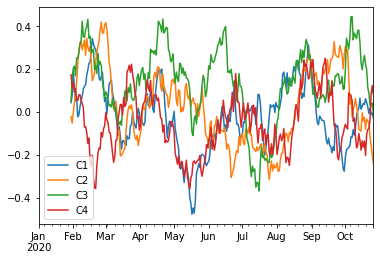

In [432]:
df.rolling(30).mean().plot()

<AxesSubplot:>

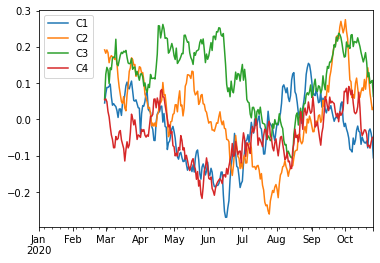

In [433]:
df.rolling(60).mean().plot()

<AxesSubplot:>

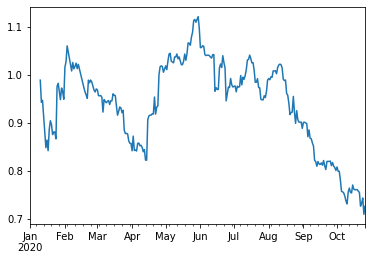

In [434]:
df.C1.rolling(60, min_periods=10).std().plot()

<AxesSubplot:>

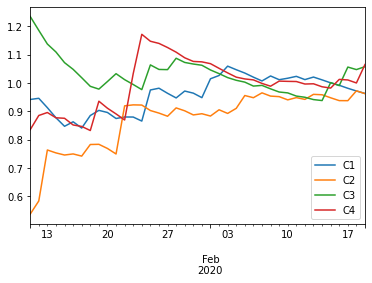

In [435]:
df.rolling(60, min_periods=10).std()[10:50].plot()

<AxesSubplot:>

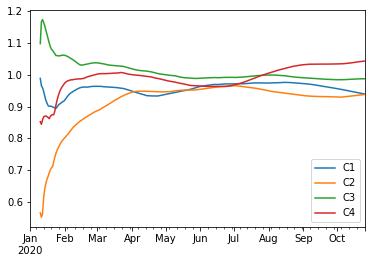

In [436]:
df.rolling(60, min_periods=10).std().expanding().mean().plot()

<AxesSubplot:>

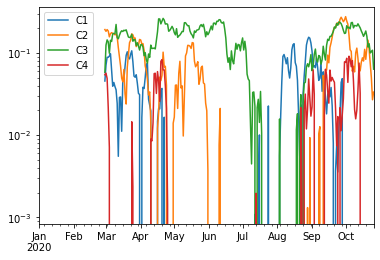

In [437]:
df.rolling(60).mean().plot(logy=True)

<AxesSubplot:>

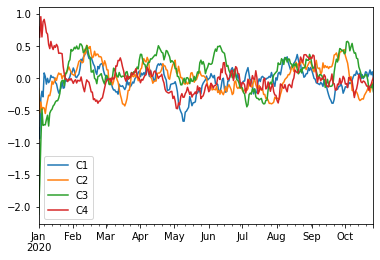

In [438]:
df.rolling('20D').mean().plot()

<AxesSubplot:>

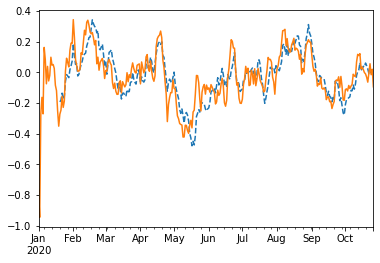

In [439]:
df.C1.rolling(30, min_periods=20).mean().plot(style='--', label='Simple MA')
df.C1.ewm(span=30).mean().plot(style='-', label='EWMA')

<AxesSubplot:>

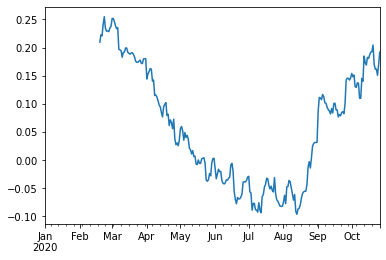

In [440]:
df.C1.rolling(100, min_periods=50).corr(df.C3).plot()

<AxesSubplot:>

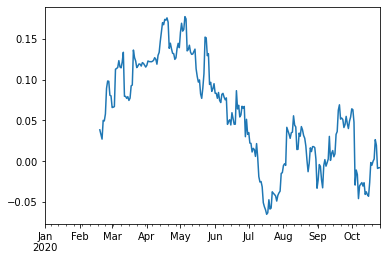

In [441]:
df.C2.rolling(100, min_periods=50).corr(df.C4).plot()

## 데이터 읽기 및 저장

|함수|설명|
|--|--|
|`read_csv`|파일,URL,객체도구로부터 구분된 데이터 읽기(기본 구분자:',')|
|`read_table`|파일,URL,객체도구로부터 구분된 데이터 읽기(기본 구분자:'\t')|
|`read_fwf`|고정폭 컬럼 형식에서 데이터 읽기(구분자 없는 데이터)|
|`read_clipboard`|클립보드에 있는 데이터 읽기, 웹페이지에 있는 표를 읽어올 때 유용|
|`read_exccel`|엑셀 파일(xls,xlsx)에서 표 형식 데이터 읽기|
|`read_hdf`|Pandas에서 저장한 HDFS파일의 데이터 읽기|
|`read_html`|HTML 문서 내의 모든 테이블 데이터 읽기|
|`read_json`|JSON에서 데이터 읽기|
|`read_msgpack`|메시지팩 바이너리 포맷으로 인코딩된 pandas 데이터 읽기|
|`read_pickle`|파이썬 피클 포맷으로 저장된 객체 읽기|
|`read_sas`|SAS 시스템의 사용자 정의 저장 포맷 데이터 읽기|
|`read_sql`|SQL 질의 결과를 DataFrame 형식으로 읽기|
|`read_stata`|Stata 파일에서 데이터 읽기|
|`read_feather`|Feather 바이너리 파일 포맷의 데이터 읽기|

### 텍스트 파일 읽기/쓰기

In [442]:
%%writefile example1.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv

Overwriting example1.csv


In [443]:
!ls

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [444]:
pd.read_csv('example1.csv')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv


In [445]:
%%writefile example2.csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv

Overwriting example2.csv


In [446]:
pd.read_csv('example2.csv', header=None)

,0,1,2,3,4,5
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv


In [447]:
pd.read_csv('example2.csv', names=['a', 'b', 'c', 'd', 'e', 'text'])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv


In [448]:
pd.read_csv('example2.csv', names=['a', 'b', 'c', 'd', 'e', 'text'], index_col='text')

,a,b,c,d,e
text,,,,,
hi,1,2,3,4,5
NaN,6,7,8,9,10 pandas
csv,11,12,13,14,15


In [449]:
%%writefile example3.txt
 a     b     c
1   0.1   0.2   0.3
2 0.4   0.5   0.6
3 0.7      0.8   0.9

Overwriting example3.txt


In [450]:
pd.read_table('example3.txt', sep='\s+')

,a,b,c
1,0.1,0.2,0.3
2,0.4,0.5,0.6
3,0.7,0.8,0.9


In [451]:
%%writefile example4.csv
# 파일 설명
a, b, c, d, e, text
# 컬럼은 a, b, c, d, e와 text가 있음
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv

Overwriting example4.csv


In [452]:
pd.read_csv('example4.csv', skiprows=[0,2])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv


In [453]:
%%writefile example5.csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6, 7, 8, NULL, 10 pandas
11, NA, 13, 14, 15, csv

Overwriting example5.csv


In [454]:
pd.read_csv('example5.csv')

,a,b,c,d,e,text
0,1,2,NA,4,5,hi
1,6,7,8,NULL,10 pandas,NaN
2,11,NA,13,14,15,csv


In [455]:
%%writefile example6.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10 pandas
11, 12, 13, 14, 15, csv

Overwriting example6.csv


In [456]:
pd.read_csv('example6.csv', nrows=5)

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv
3,1,2,3,4,5,hi
4,6,7,8,9,10 pandas,NaN


In [457]:
df = pd.read_csv('example6.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv
3,1,2,3,4,5,hi
4,6,7,8,9,10 pandas,NaN
5,11,12,13,14,15,csv
6,1,2,3,4,5,hi
7,6,7,8,9,10 pandas,NaN
8,11,12,13,14,15,csv
9,1,2,3,4,5,hi


In [458]:
df.to_csv('output.csv')

In [459]:
!cat output.csv

'cat'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [460]:
dr = pd.date_range('2020-01-01', periods=10)
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
2020-01-06    5
2020-01-07    6
2020-01-08    7
2020-01-09    8
2020-01-10    9
Freq: D, dtype: int32

In [461]:
ts.to_csv('ts.csv', header=['value'])

In [462]:
!cat ts.csv

'cat'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [463]:
%%writefile example.json
[{"a":1, "b":2, "c":3, "d":4, "e":5},
{"a":6, "b":7, "c":8, "d":9, "e":10},
 {"a":11, "b":12, "c":13, "d":14, "e":15}]

Overwriting example.json


In [464]:
!cat example.json

'cat'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [465]:
pd.read_json('example.json')

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15


In [466]:
ts.to_json('output.json')

In [467]:
!cat output.json

'cat'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [468]:
df.to_json("output.json")

In [469]:
!cat output.json

'cat'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


### 이진 데이터 파일 읽기/쓰기

In [470]:
df = pd.read_csv('example1.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv


In [471]:
df.to_pickle('df_pickle')
pd.read_pickle('df_pickle')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10 pandas,NaN
2,11,12,13,14,15,csv


In [472]:
df = pd.DataFrame({'a': np.random.randn(100),
                   'b': np.random.randn(100),
                   'c': np.random.randn(100),})
df

,a,b,c
0,-0.679460,0.915577,0.386249
1,0.027160,-0.988636,-0.445350
2,-0.391486,1.129067,-1.065804
3,-0.260900,-0.750188,-0.326128
4,1.181851,0.753646,-1.014958
...,...,...,...
95,0.633724,1.184285,-0.378498
96,0.987183,-0.212403,0.283527
97,-0.430964,1.794401,-0.896191
98,0.126400,0.457921,-2.736221


In [473]:
h = pd.HDFStore('data.h5')
h['obj1'] = df
h['obj1_col1'] = df['a']
h['obj1_col2'] = df['b']
h['obj1_col3'] = df['c']
h

<class 'pandas.io.pytables.HDFStore'>
File path: data.h5

In [474]:
h['obj1']

,a,b,c
0,-0.679460,0.915577,0.386249
1,0.027160,-0.988636,-0.445350
2,-0.391486,1.129067,-1.065804
3,-0.260900,-0.750188,-0.326128
4,1.181851,0.753646,-1.014958
...,...,...,...
95,0.633724,1.184285,-0.378498
96,0.987183,-0.212403,0.283527
97,-0.430964,1.794401,-0.896191
98,0.126400,0.457921,-2.736221


In [475]:
h.put('obj2', df, format='table')

In [476]:
h.select('obj2', where=['index > 50 and index <= 60'])

,a,b,c
51,-2.157432,1.144195,-0.701773
52,0.417057,-0.842539,-0.706869
53,-0.323854,1.725213,0.288401
54,0.044016,1.064211,1.924754
55,-1.049633,1.777105,0.031084
56,1.191378,-0.755785,0.426837
57,-1.005815,1.029605,0.034912
58,-0.789760,1.626761,-0.966961
59,-0.355111,0.317785,1.277914
60,0.072518,1.711322,-0.599711


In [477]:
h.close()

In [478]:
df.to_hdf('data.h5', 'obj3', format='table')

In [479]:
pd.read_hdf('data.h5','obj3', where=['index < 10'])

,a,b,c
0,-0.679460,0.915577,0.386249
1,0.027160,-0.988636,-0.445350
2,-0.391486,1.129067,-1.065804
3,-0.260900,-0.750188,-0.326128
4,1.181851,0.753646,-1.014958
5,-0.034460,1.132404,0.094964
6,-1.256864,-1.306550,-1.857575
7,1.641947,1.265866,-1.500367
8,-1.317571,-0.201698,1.593342
9,0.025862,0.781590,0.121626


In [480]:
df.to_excel('example.xlsx', 'Sheet1')

In [481]:
!ls

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [482]:
pd.read_excel('example.xlsx', 'Sheet1')

,Unnamed: 0,a,b,c
0,0,-0.679460,0.915577,0.386249
1,1,0.027160,-0.988636,-0.445350
2,2,-0.391486,1.129067,-1.065804
3,3,-0.260900,-0.750188,-0.326128
4,4,1.181851,0.753646,-1.014958
...,...,...,...,...
95,95,0.633724,1.184285,-0.378498
96,96,0.987183,-0.212403,0.283527
97,97,-0.430964,1.794401,-0.896191
98,98,0.126400,0.457921,-2.736221


## 데이터 정제

### 누락값 처리

* 대부분의 실제 데이터들은 정제되지 않고 누락값들이 존재
* 서로 다른 데이터들은 다른 형태의 결측을 가짐
* 결측 데이터는 `null`, `NaN`, `NA`로 표기

#### None: 파이썬 누락 데이터

In [483]:
a = np.array([1, 2, None, 4, 5])
a

array([1, 2, None, 4, 5], dtype=object)

In [484]:
a.sum() # None 계산 불가능

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

#### NaN: 누락된 수치 데이터

In [485]:
a = np.array([1, 2, np.nan, 4, 5])
a.dtype

dtype('float64')

In [486]:
0 + np.nan

nan

In [487]:
np.nan + np.nan

nan

In [488]:
a.sum(), a.min(), a.max()

(nan, nan, nan)

In [489]:
np.nansum(a), np.nanmin(a), np.nanmax(a) # nan값 빼고 계산

(12.0, 1.0, 5.0)

In [490]:
pd.Series([1, 2, np.nan, 4, None])

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [491]:
s = pd.Series(range(5), dtype=int)
s

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [492]:
s[0] = None
s

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [493]:
s[3] = np.nan

In [494]:
s = pd.Series([True, False, None, np.nan])
s

0     True
1    False
2     None
3      NaN
dtype: object

#### Null 값 처리

|인자|설명|
|--|--|
|`isnull()`|누락되거나 NA인 값을 불리언 값으로 변환|
|`notnull()`|`isnull`의 반대|
|`dropna()`|누락된 데이터가 있는 축 제외|
|`fillna()`|누락된 값을 대체하거나 `ffill`이나 `bfill`로 보간 메소드 적용|

In [495]:
s = pd.Series([1, 2, np.nan, 'String', None])
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [496]:
s.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [497]:
s[s.notnull()]

0         1
1         2
3    String
dtype: object

In [498]:
s.dropna()

0         1
1         2
3    String
dtype: object

In [499]:
df.dropna(axis='columns')

,a,b,c
0,-0.679460,0.915577,0.386249
1,0.027160,-0.988636,-0.445350
2,-0.391486,1.129067,-1.065804
3,-0.260900,-0.750188,-0.326128
4,1.181851,0.753646,-1.014958
...,...,...,...
95,0.633724,1.184285,-0.378498
96,0.987183,-0.212403,0.283527
97,-0.430964,1.794401,-0.896191
98,0.126400,0.457921,-2.736221


In [500]:
df[3] = np.nan
df

,a,b,c,3
0,-0.679460,0.915577,0.386249,NaN
1,0.027160,-0.988636,-0.445350,NaN
2,-0.391486,1.129067,-1.065804,NaN
3,-0.260900,-0.750188,-0.326128,NaN
4,1.181851,0.753646,-1.014958,NaN
...,...,...,...,...
95,0.633724,1.184285,-0.378498,NaN
96,0.987183,-0.212403,0.283527,NaN
97,-0.430964,1.794401,-0.896191,NaN
98,0.126400,0.457921,-2.736221,NaN


In [501]:
df.dropna(axis='columns', how='all')

,a,b,c
0,-0.679460,0.915577,0.386249
1,0.027160,-0.988636,-0.445350
2,-0.391486,1.129067,-1.065804
3,-0.260900,-0.750188,-0.326128
4,1.181851,0.753646,-1.014958
...,...,...,...
95,0.633724,1.184285,-0.378498
96,0.987183,-0.212403,0.283527
97,-0.430964,1.794401,-0.896191
98,0.126400,0.457921,-2.736221


In [502]:
df.dropna(axis='rows', thresh=3)

,a,b,c,3
0,-0.679460,0.915577,0.386249,NaN
1,0.027160,-0.988636,-0.445350,NaN
2,-0.391486,1.129067,-1.065804,NaN
3,-0.260900,-0.750188,-0.326128,NaN
4,1.181851,0.753646,-1.014958,NaN
...,...,...,...,...
95,0.633724,1.184285,-0.378498,NaN
96,0.987183,-0.212403,0.283527,NaN
97,-0.430964,1.794401,-0.896191,NaN
98,0.126400,0.457921,-2.736221,NaN


In [503]:
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [504]:
s.fillna(0)

0         1
1         2
2         0
3    String
4         0
dtype: object

In [505]:
s.fillna(method='ffill')

0         1
1         2
2         2
3    String
4    String
dtype: object

In [506]:
s.fillna(method='bfill')

0         1
1         2
2    String
3    String
4      None
dtype: object

In [507]:
df

,a,b,c,3
0,-0.679460,0.915577,0.386249,NaN
1,0.027160,-0.988636,-0.445350,NaN
2,-0.391486,1.129067,-1.065804,NaN
3,-0.260900,-0.750188,-0.326128,NaN
4,1.181851,0.753646,-1.014958,NaN
...,...,...,...,...
95,0.633724,1.184285,-0.378498,NaN
96,0.987183,-0.212403,0.283527,NaN
97,-0.430964,1.794401,-0.896191,NaN
98,0.126400,0.457921,-2.736221,NaN


In [508]:
df.fillna(method='ffill', axis=0)

,a,b,c,3
0,-0.679460,0.915577,0.386249,NaN
1,0.027160,-0.988636,-0.445350,NaN
2,-0.391486,1.129067,-1.065804,NaN
3,-0.260900,-0.750188,-0.326128,NaN
4,1.181851,0.753646,-1.014958,NaN
...,...,...,...,...
95,0.633724,1.184285,-0.378498,NaN
96,0.987183,-0.212403,0.283527,NaN
97,-0.430964,1.794401,-0.896191,NaN
98,0.126400,0.457921,-2.736221,NaN


In [509]:
df.fillna(method='ffill', axis=1)

,a,b,c,3
0,-0.679460,0.915577,0.386249,0.386249
1,0.027160,-0.988636,-0.445350,-0.445350
2,-0.391486,1.129067,-1.065804,-1.065804
3,-0.260900,-0.750188,-0.326128,-0.326128
4,1.181851,0.753646,-1.014958,-1.014958
...,...,...,...,...
95,0.633724,1.184285,-0.378498,-0.378498
96,0.987183,-0.212403,0.283527,0.283527
97,-0.430964,1.794401,-0.896191,-0.896191
98,0.126400,0.457921,-2.736221,-2.736221


In [510]:
df.fillna(method='bfill', axis=0)

,a,b,c,3
0,-0.679460,0.915577,0.386249,NaN
1,0.027160,-0.988636,-0.445350,NaN
2,-0.391486,1.129067,-1.065804,NaN
3,-0.260900,-0.750188,-0.326128,NaN
4,1.181851,0.753646,-1.014958,NaN
...,...,...,...,...
95,0.633724,1.184285,-0.378498,NaN
96,0.987183,-0.212403,0.283527,NaN
97,-0.430964,1.794401,-0.896191,NaN
98,0.126400,0.457921,-2.736221,NaN


In [511]:
df. fillna(method='bfill', axis=1)

,a,b,c,3
0,-0.679460,0.915577,0.386249,NaN
1,0.027160,-0.988636,-0.445350,NaN
2,-0.391486,1.129067,-1.065804,NaN
3,-0.260900,-0.750188,-0.326128,NaN
4,1.181851,0.753646,-1.014958,NaN
...,...,...,...,...
95,0.633724,1.184285,-0.378498,NaN
96,0.987183,-0.212403,0.283527,NaN
97,-0.430964,1.794401,-0.896191,NaN
98,0.126400,0.457921,-2.736221,NaN


### 중복 제거

In [512]:
df = pd.DataFrame({'c1': ['a', 'b', 'c'] * 2 + ['b'] + ['c'],
                   'c2': [1, 2, 1, 1, 2, 3, 3, 4]})
df

,c1,c2
0,a,1
1,b,2
2,c,1
3,a,1
4,b,2
5,c,3
6,b,3
7,c,4


In [513]:
df.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [514]:
df.drop_duplicates()

,c1,c2
0,a,1
1,b,2
2,c,1
5,c,3
6,b,3
7,c,4


### 값 치환

In [515]:
s = pd.Series([1., 2., -999, 3., -1000., 4.])
s

0       1.0
1       2.0
2    -999.0
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [516]:
s.replace(-999, np.nan)

0       1.0
1       2.0
2       NaN
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [517]:
s.replace([-999, -1000], np.nan)

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
5    4.0
dtype: float64

In [518]:
s.replace([-999, -1000], [np.nan, 0])

0    1.0
1    2.0
2    NaN
3    3.0
4    0.0
5    4.0
dtype: float64

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly